The dataset comprises 14 numerical and 4 categorical attributes, with the 'Revenue' attribute serving as the class label. The features provide detailed information about user interactions with the e-commerce site.

1. Numerical Attributes:
- Administrative: Number of pages visited in the "Administrative" category.
- Administrative_Duration: Total time spent on pages in the "Administrative" category.
- Informational: Number of pages visited in the "Informational" category.
- Informational_Duration: Total time spent on pages in the "Informational" category.
- ProductRelated: Number of pages visited in the "ProductRelated" category.
- ProductRelated_Duration: Total time spent on pages in the "ProductRelated" category.
- BounceRates: The percentage of visitors who leave the site after viewing only one page.
- ExitRates: The percentage of visitors who leave the site from a specific page.
- PageValues: The average value of pages visited before completing a purchase.
- SpecialDay: Indicates the closeness of the visit to a special day (e.g., holidays).
- OperatingSystems: The operating system used by the visitor.
- Browser: The browser used by the visitor.
- Region: The geographic region from which the visitor accessed the site.
- TrafficType: The type of traffic that led the visitor to the site.


2. Categorical Attributes:
- VisitorType: Whether the visitor is a returning or new visitor.
- Month: The month in which the visit occurred.
- Weekend: Whether the visit occurred on a weekend.
- Revenue: Indicates whether the visit resulted in a transaction (target variable).

  By analyzing these features, we can train a machine learning model to predict the likelihood of a visit resulting in a purchase, thus helping to improve marketing strategies, website design, and user experience optimization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.feature_selection import SelectKBest, chi2, RFE

In [2]:
# Loading the dataset
df = pd.read_csv('online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
#Summary of the DataFrame, including the index dtype, column dtypes, non-null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
# Displaying the first few rows of the dataset
print(df.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [5]:
# Displaying the last few rows of the dataset
print(df.tail())

       Administrative  Administrative_Duration  Informational  \
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
12325     0.007143   0.029031   12.241717         0.0   Dec                 4   
12

In [6]:
df.shape

(12330, 18)

#### EDA

In [7]:
# Check for null values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

There is no null values in the dataset

In [8]:
# Check for duplicate row
df.duplicated().sum()

125

In [9]:
# Check the datatypes
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [10]:
# Identify numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')

In [11]:
# Identify categorical columns
categorical_features = df.select_dtypes(include=['object', 'bool']).columns
categorical_features

Index(['Month', 'VisitorType', 'Weekend', 'Revenue'], dtype='object')

In [12]:
# Perform descriptive statistics
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


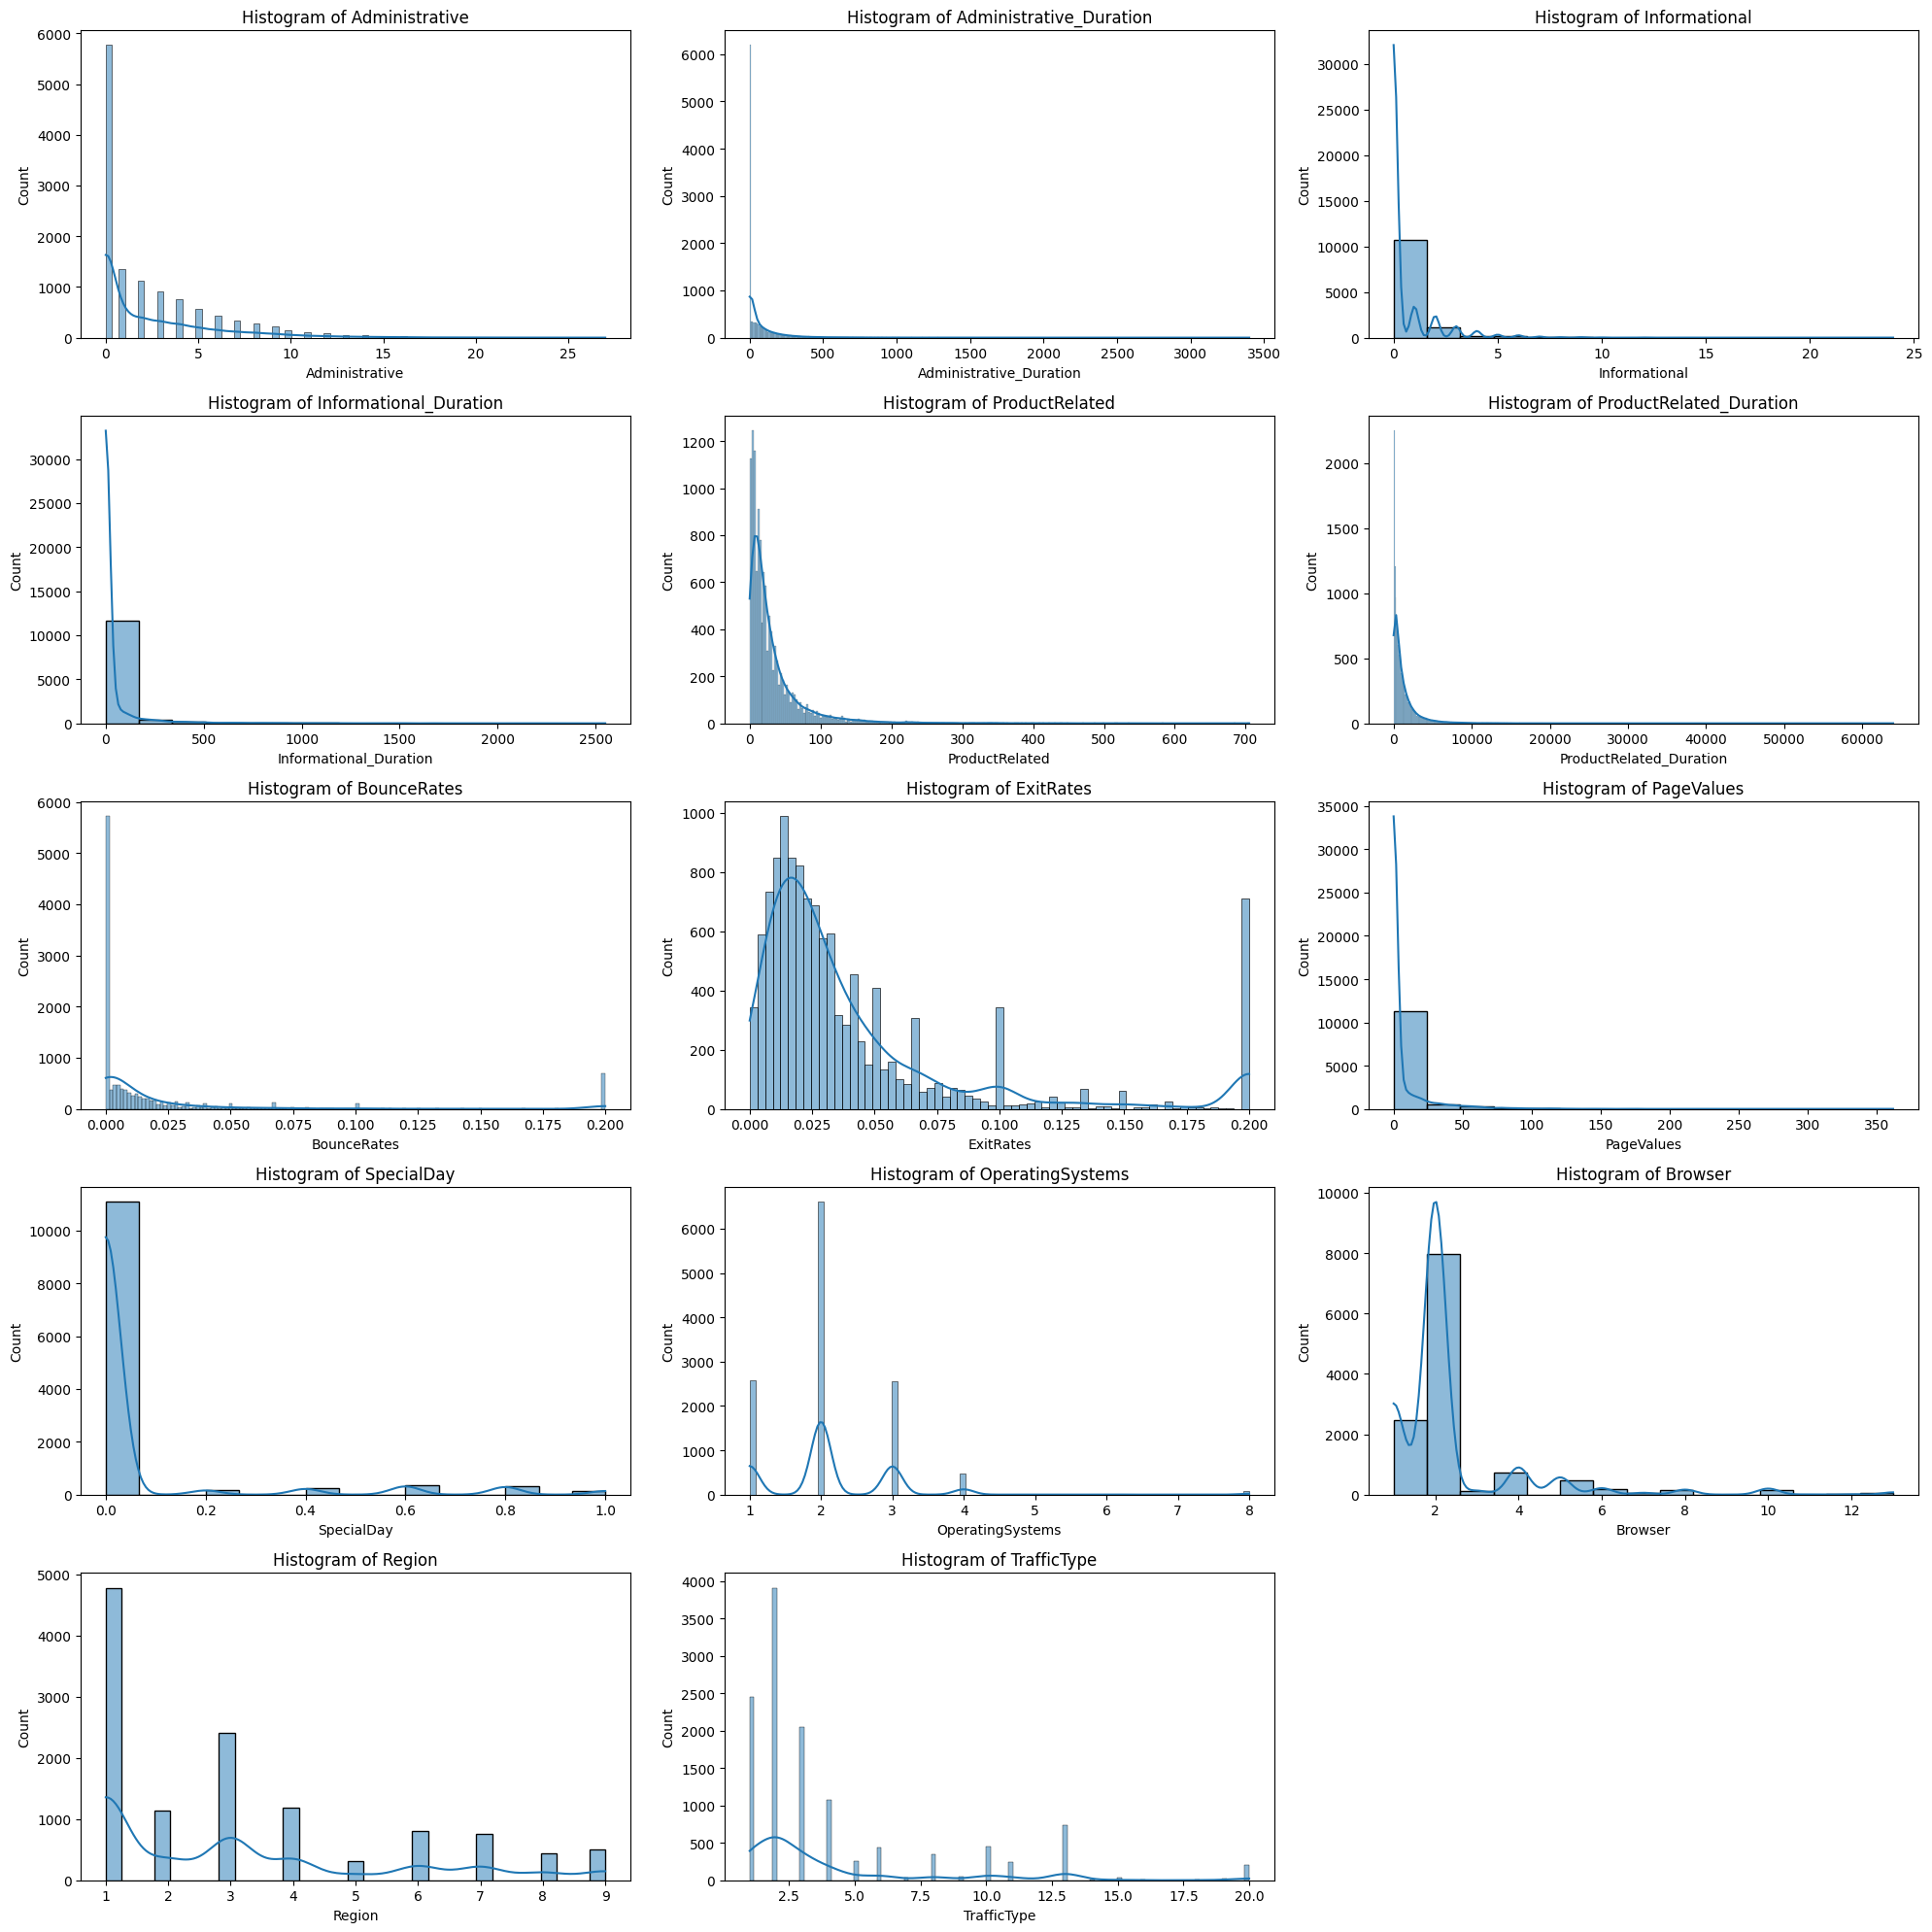

In [13]:
# Histograms for numerical features
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features)//3 + 1, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()

The histograms provide valuable insights into the distribution of each feature in dataset. Here are some observations for each feature:

1. **Administrative**: 
   - Most values are concentrated at 0-3.
   - Indicates that users often visit very few administrative pages.

2. **Administrative_Duration**:
   - Majority of the values are close to 0.
   - There are a few extreme values (outliers) that go up to 3500.
   - Most users spend minimal time on administrative pages.

3. **Informational**:
   - Most values are concentrated at 0-2.
   - Similar to Administrative, the frequency drops rapidly.
   - Indicates that users rarely visit informational pages.

4. **Informational_Duration**:
   - Similar to Administrative_Duration, most values are close to 0.
   - Few users spend a lot of time on informational pages, with some outliers reaching up to 2500.

5. **ProductRelated**:
   - Majority of the values are concentrated at 0-100.
   - There is a gradual decline in frequency as the value increases, with a long tail.
   - Users typically visit fewer product-related pages, but some visit many.

6. **ProductRelated_Duration**:
   - Most values are near 0, with a long tail up to 60000.
   - Indicates a wide variation in the time spent on product-related pages.

7. **BounceRates**:
   - Majority of the values are near 0.
   - There is a small peak near 0.2, indicating some sessions have high bounce rates.
   - Most sessions have low bounce rates.

8. **ExitRates**:
   - Majority of the values are near 0.025, with a gradual decline.
   - A small peak near 0.2 indicates some sessions end abruptly.
   - Most sessions have low exit rates, suggesting user engagement.

9. **PageValues**:
   - Most values are near 0.
   - There is a long tail extending up to 350.
   - Indicates that most pages have low values, with a few high-value pages.

10. **SpecialDay**:
    - Majority of the values are 0, indicating most visits do not occur on special days.
    - There are few values near 1, representing visits on special days.

11. **OperatingSystems**:
    - Most common values are 1, 2, 4, and 3.
    - Indicates a few operating systems dominate user visits.

12. **Browser**:
    - Majority of the values are concentrated between 1 and 2.
    - Indicates a few browsers are predominantly used.

13. **Region**:
    - Most values are 1, 3, and 2.
    - Indicates that most users come from these regions.

14. **TrafficType**:
    - Most values are 2 and 1, with other values having a smaller frequency.
    - Indicates that a few traffic sources are dominant.

Overall, the histograms suggest a high level of skewness in most features, with values concentrated near 0 and a long tail. 

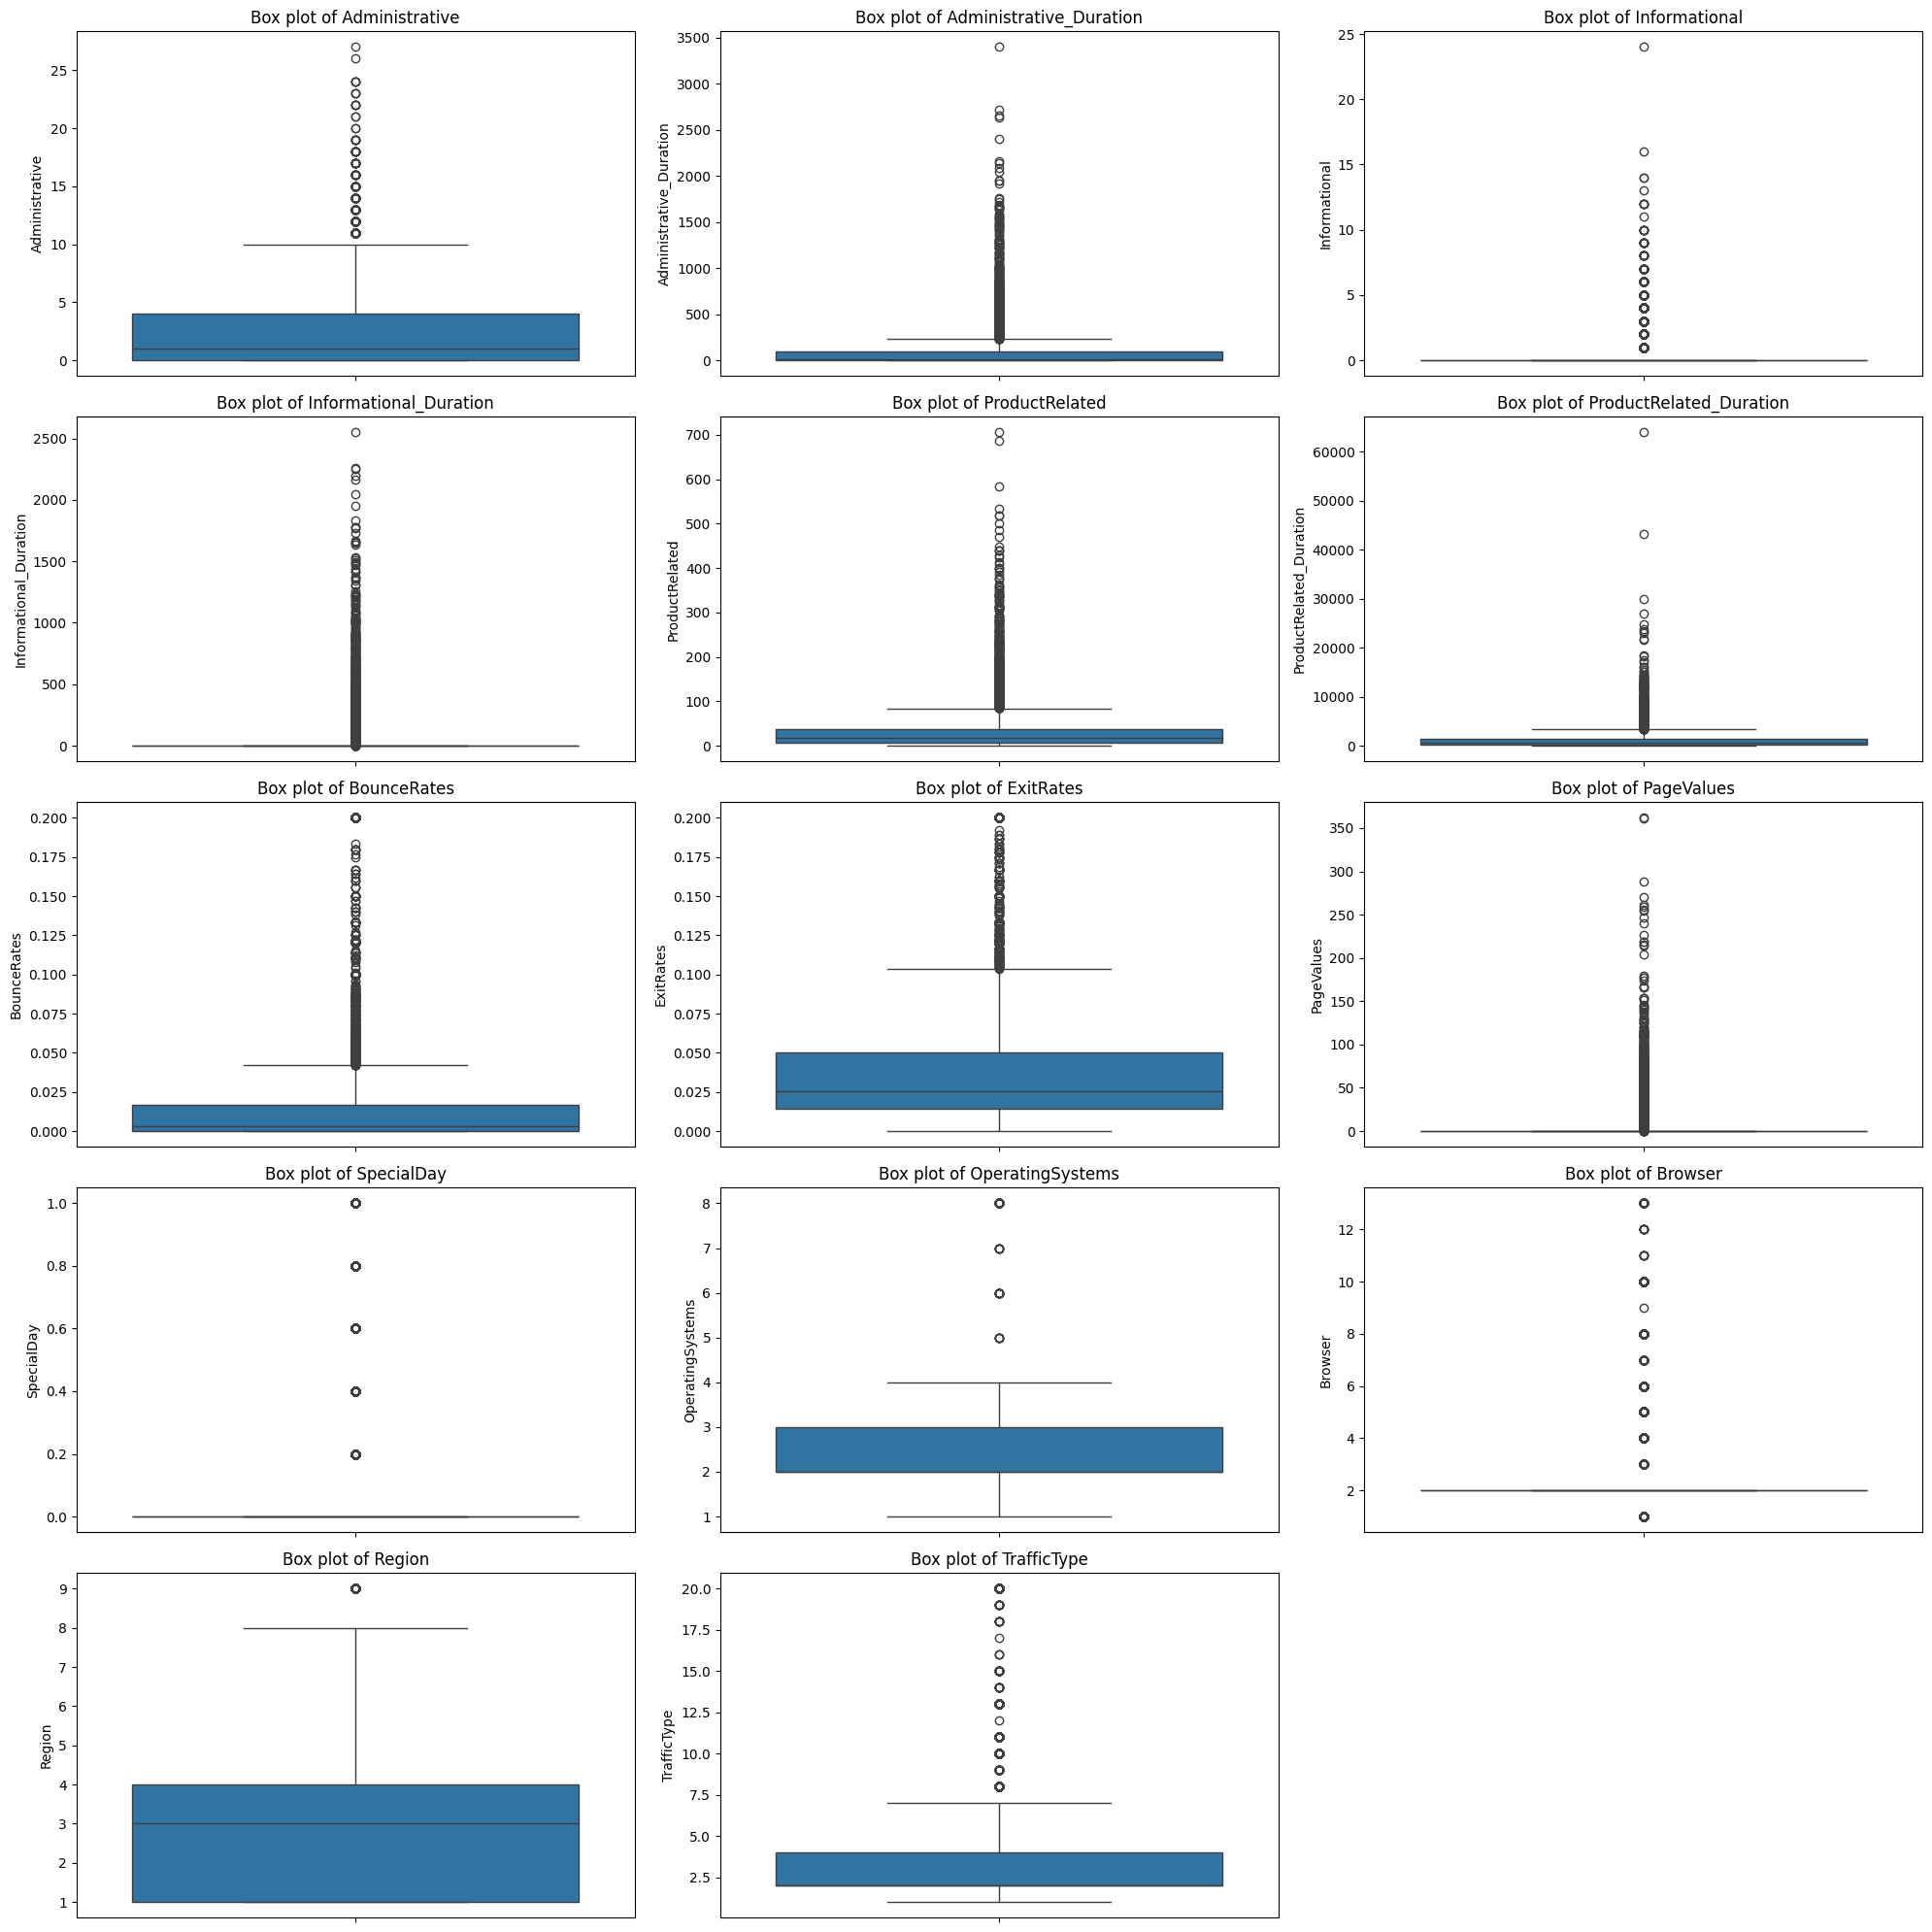

In [14]:
# Box plots for numerical features
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features)//3 + 1, 3, i+1)
    sns.boxplot(y=df[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()

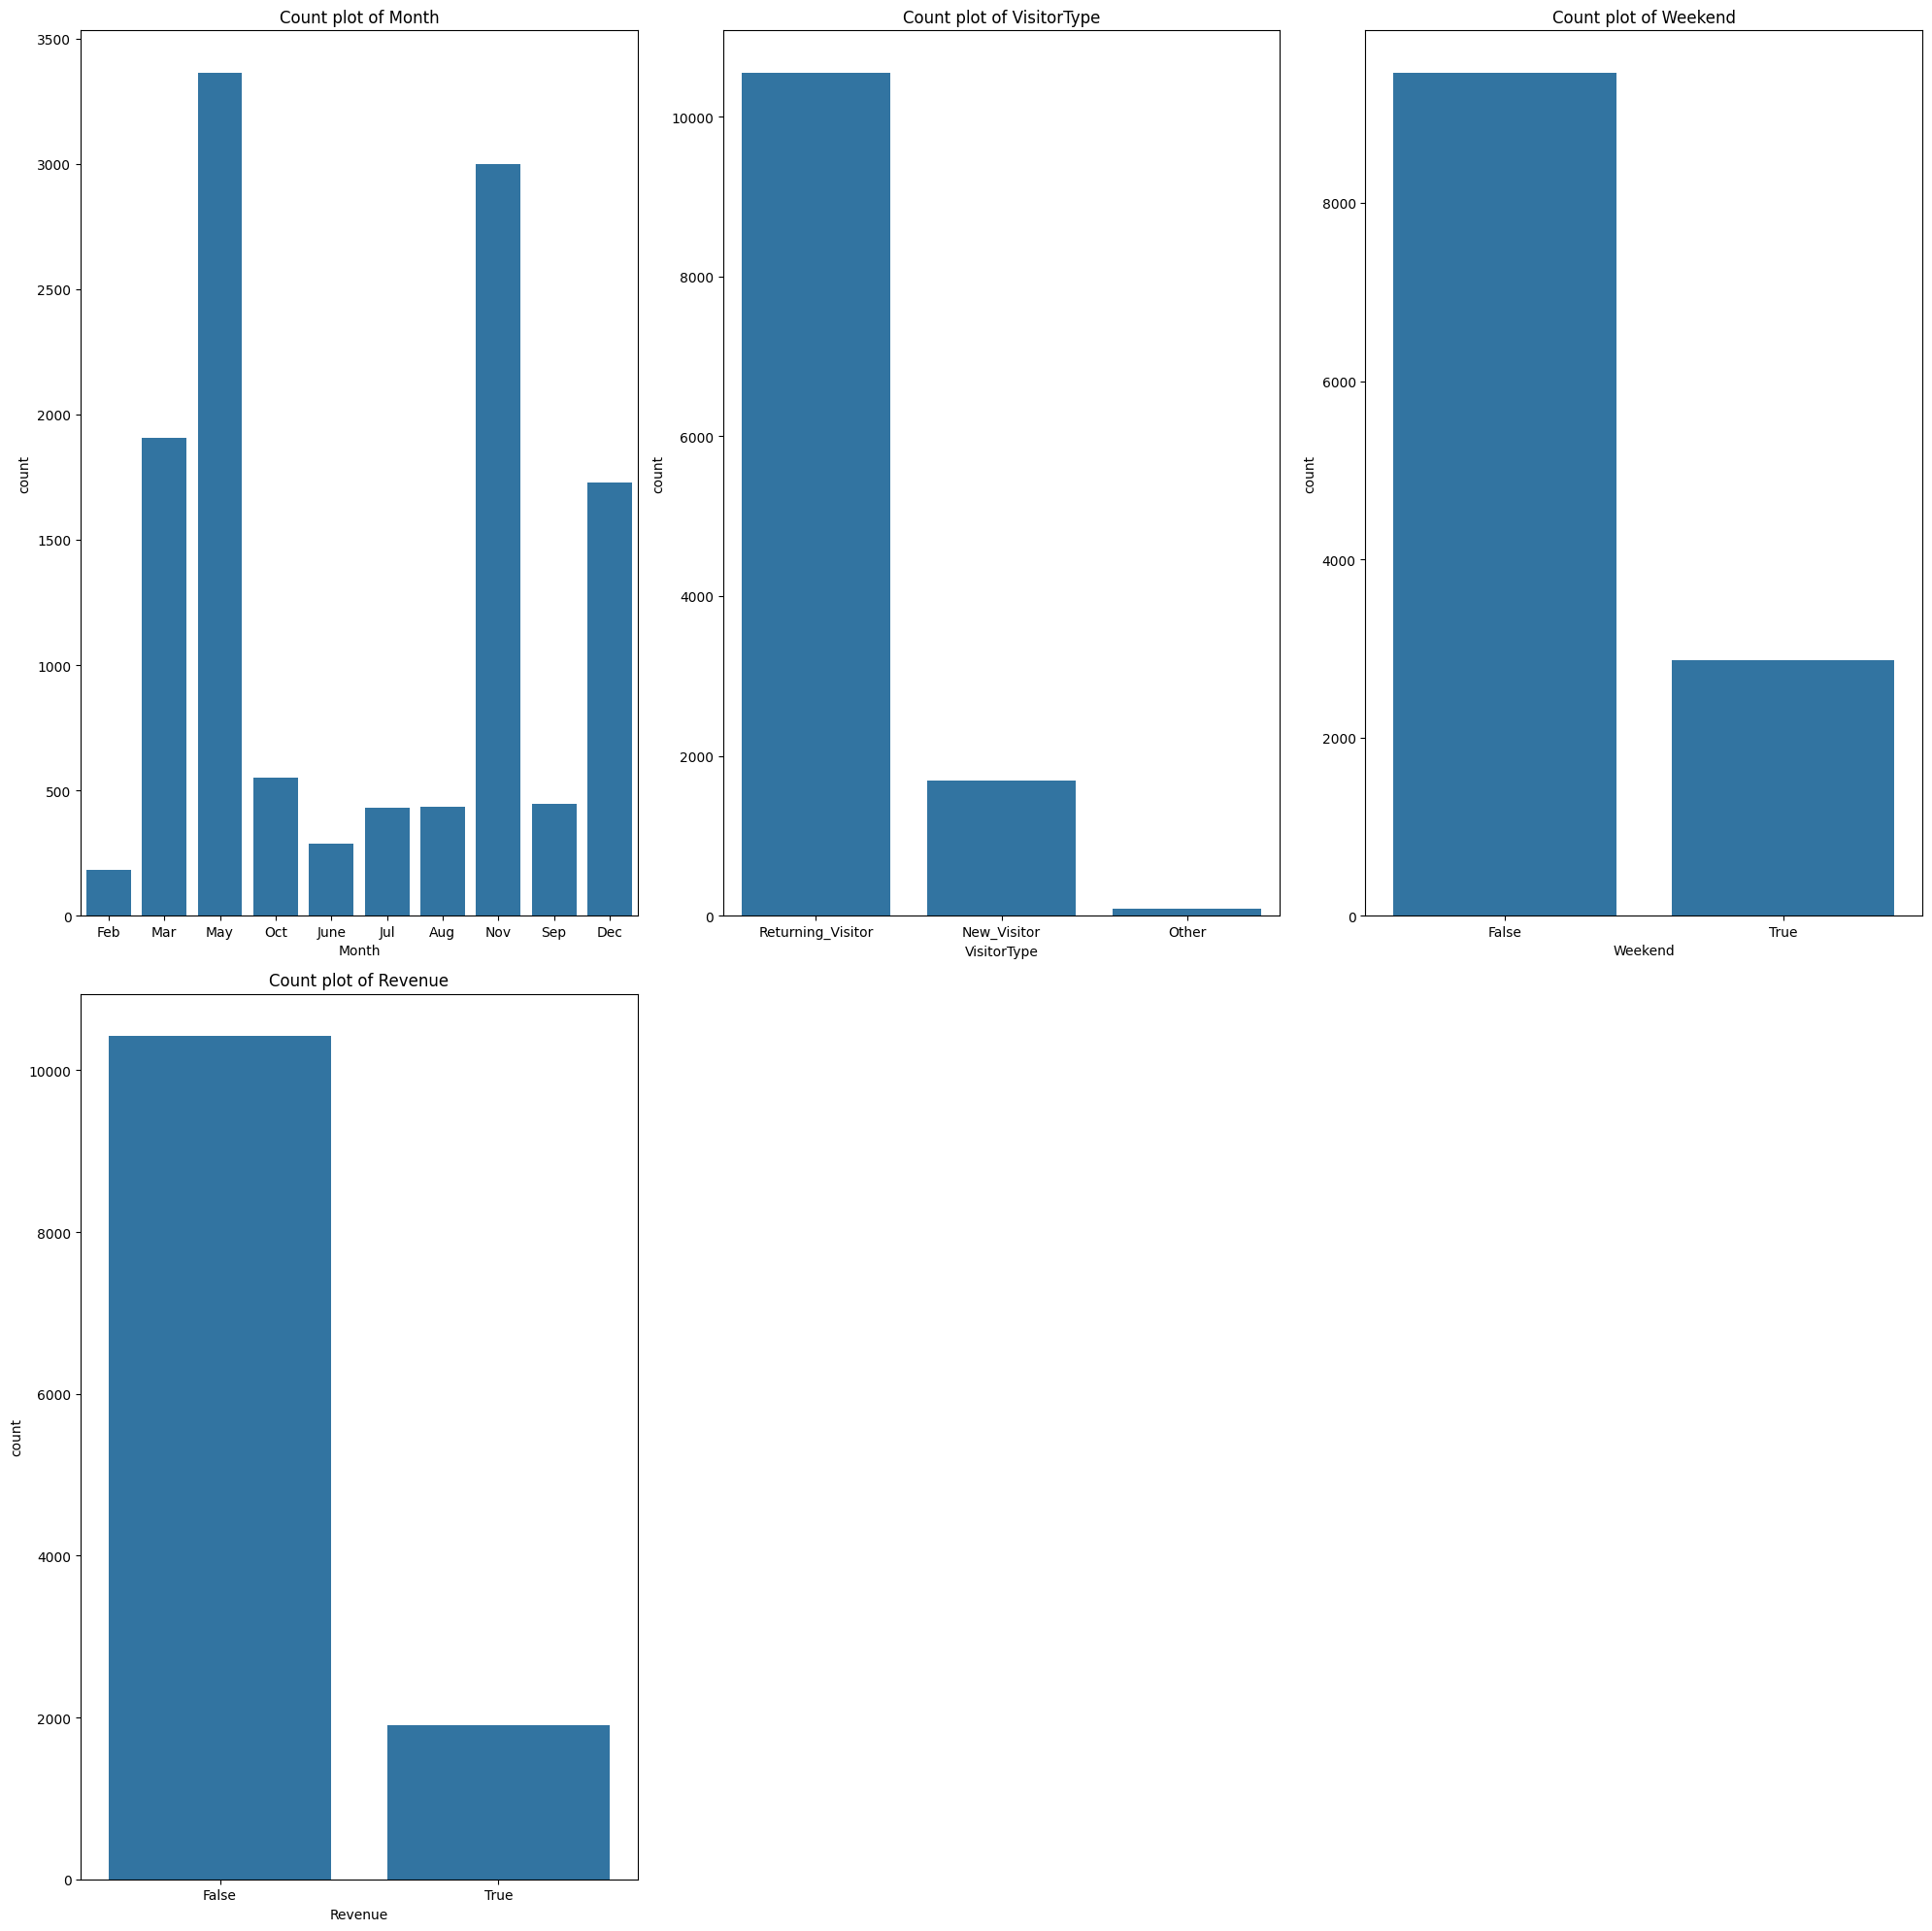

In [15]:
# Count plots for categorical features
plt.figure(figsize=(20, 20))
for i, feature in enumerate(categorical_features):
    plt.subplot(len(categorical_features)//3 + 1, 3, i+1)
    sns.countplot(x=df[feature])
    plt.title(f'Count plot of {feature}')
plt.tight_layout()

1. Month-wise Visitor Count:
The highest number of visitors is in May and November, each peaking over 3000.
February, June, July, August, September and October have the lowest visitor counts, all under 1000.
There is a noticeable increase in visitors in March and December, suggesting seasonal trends.

2. Visitor Type Count:
The majority of visitors are returning visitors, with counts exceeding 10,000.
New visitors are significantly fewer, with counts below 4000.
Other types of visitors are negligible in number.

3. Weekend Count:
Most visits occur on weekdays (labeled as False for Weekend), with counts exceeding 9000.
Weekend visits are considerably lower, around 2500.

4. Revenue Generation:
A substantial majority of the visits do not generate revenue, with counts over 10,000.
Visits that generate revenue are significantly fewer, with counts around 2500.


Text(0.5, 1.0, 'Correlation Matrix')

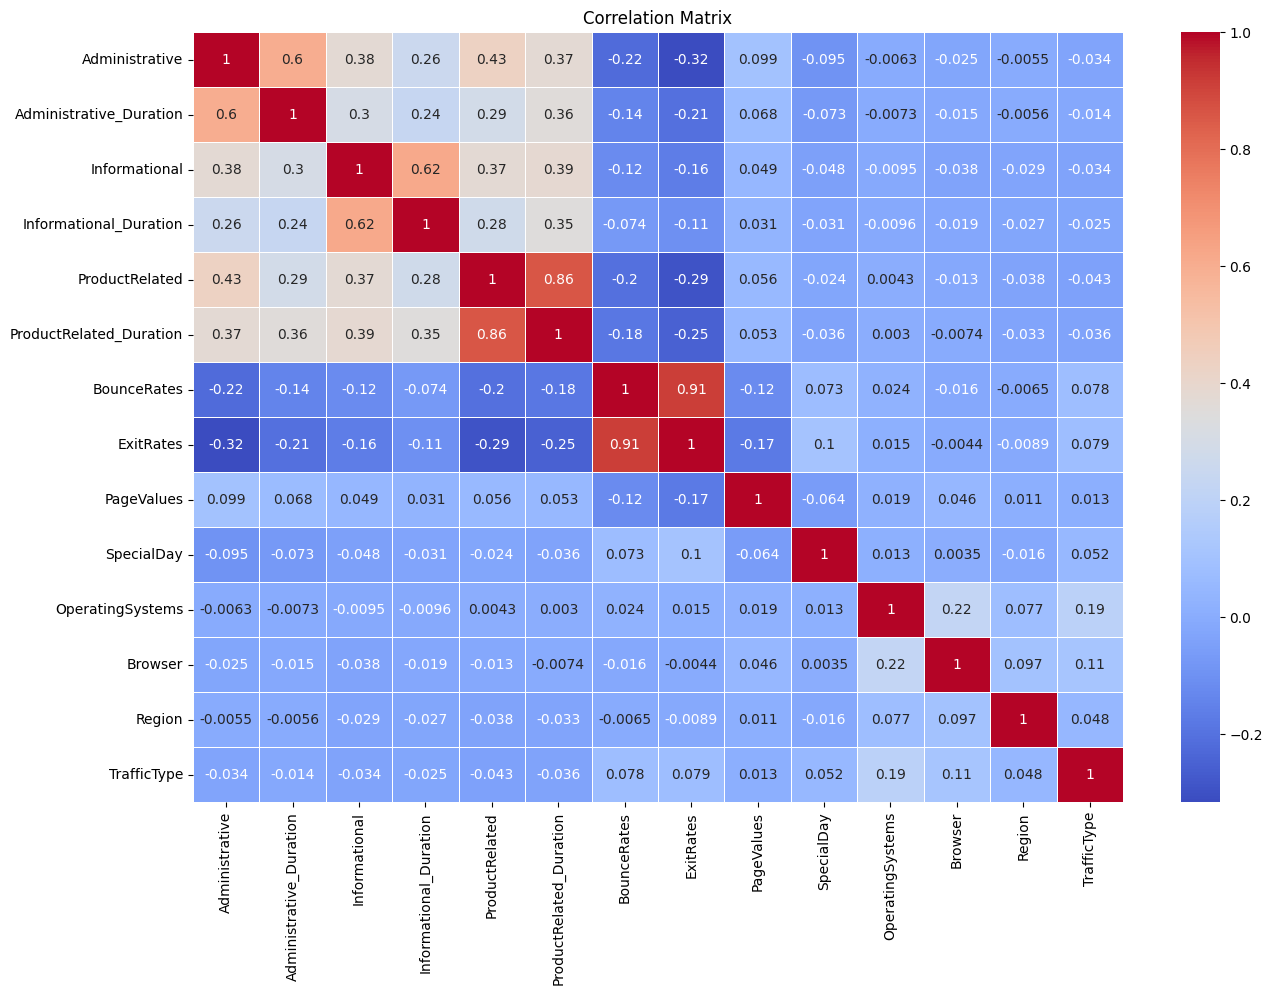

In [17]:
# Correlation matrix
corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

1. Highly Correlated Pairs:

    BounceRates and ExitRates: The correlation coefficient is 0.91, indicating a very strong positive correlation. 
    ProductRelated and ProductRelated_Duration: The correlation coefficient is 0.86, indicating a strong positive correlation. 
   
2. Moderate Correlations:

    Administrative and Administrative_Duration: The correlation coefficient is 0.6, showing a moderate positive correlation. 
    Informational and Informational_Duration: The correlation coefficient is 0.62, indicating a moderate positive correlation. 
    ProductRelated and ProductRelated_Duration: With a coefficient of 0.66, it indicates a moderate positive correlation.
   
3. Negative Correlations:

    Some features have weak negative correlations, like BounceRates with ProductRelated (-0.2) and Administrative with ExitRates (-0.32), indicating that an increase in one might slightly relate to a decrease in the other.

Features with high correlations to each other might be combined or one might be removed to reduce multicollinearity.
Features with low or no correlation to the target variable (Revenue) should be carefully evaluated for their predictive power.

In [18]:
# Skewness 
print("\nSkewness of numerical features:")
print(df[numerical_features].skew())


Skewness of numerical features:
Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
dtype: float64


1. High Skewness Values:

Informational_Duration (7.579), ProductRelated_Duration (7.263), PageValues (6.383), Administrative_Duration (5.616): These features have extremely high skewness, suggesting that there are a few very high values compared to the rest of the data. This can impact statistical analysis and machine learning models, potentially causing them to be biased towards these high values.
ProductRelated (4.342), Informational (4.036): These features also exhibit significant skewness, indicating the presence of outliers or a non-uniform distribution of values.

2. Moderate Skewness Values:
BounceRates (2.948), SpecialDay (3.303), Browser (3.242), ExitRates (2.149), OperatingSystems (2.066): These features have moderate skewness, which may still affect the performance of models and may benefit from transformation.

3. Lower Skewness Values:
Region (0.984): This feature has the lowest skewness among the features, indicating a more symmetric distribution. It is less likely to require transformation for modeling purposes.
TrafficType (1.963), Administrative (1.960): These features have relatively lower skewness compared to others but still indicate a right-skewed distribution.

In [19]:
# Kurtosis
print("\nKurtosis of numerical features:")
print(df[numerical_features].kurtosis())


Kurtosis of numerical features:
Administrative               4.701146
Administrative_Duration     50.556739
Informational               26.932266
Informational_Duration      76.316853
ProductRelated              31.211707
ProductRelated_Duration    137.174164
BounceRates                  7.723159
ExitRates                    4.017035
PageValues                  65.635694
SpecialDay                   9.913659
OperatingSystems            10.456843
Browser                     12.746733
Region                      -0.148680
TrafficType                  3.479711
dtype: float64


1. High Positive Kurtosis (Leptokurtic):

Administrative_Duration (50.556739), Informational (26.932266), Informational_Duration (76.316853), ProductRelated (31.211707), ProductRelated_Duration (137.174164), PageValues (65.635694), SpecialDay (9.913659), OperatingSystems (10.456843), Browser (12.746733), BounceRates (7.723159):
These features exhibit very high kurtosis, indicating a sharp peak and heavy tails. This suggests the presence of outliers.

2. Low Kurtosis (Platykurtic):

Region (-0.148680):
This feature has negative kurtosis, indicating a flatter distribution than a normal distribution.


### DATA PREPROCESSING

In [20]:
# Check for missing values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Since there are no missing values in the dataset, there is no need to apply strategies for handling missing data, such as imputation or removal.

In [21]:
# Check for duplicates
df.duplicated().sum()

125

In [22]:
# Remove duplicates
df=df.drop_duplicates()
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


#### Outlier Detection and Treatment

In [23]:
# Define the whisker function
def whisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

In [24]:
# Iterate over each numerical feature to find and handle outliers
for feature in numerical_features:
    lw, uw = whisker(df[feature])
    
    # Cap the outliers
    df[feature] = np.where(df[feature] < lw, lw, df[feature])
    df[feature] = np.where(df[feature] > uw, uw, df[feature])

C:\Users\hp\AppData\Local\Temp\ipykernel_9936\3473586354.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = np.where(df[feature] < lw, lw, df[feature])
C:\Users\hp\AppData\Local\Temp\ipykernel_9936\3473586354.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = np.where(df[feature] > uw, uw, df[feature])


In [25]:
# Check the first few rows of the dataset after outlier handling
print(df.head())

   Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                      0.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                     0.0             1.0                 0.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.041667   0.099977         0.0         0.0   Feb               1.0   
1     0.000000   0.099977         0.0         0.0   Feb   

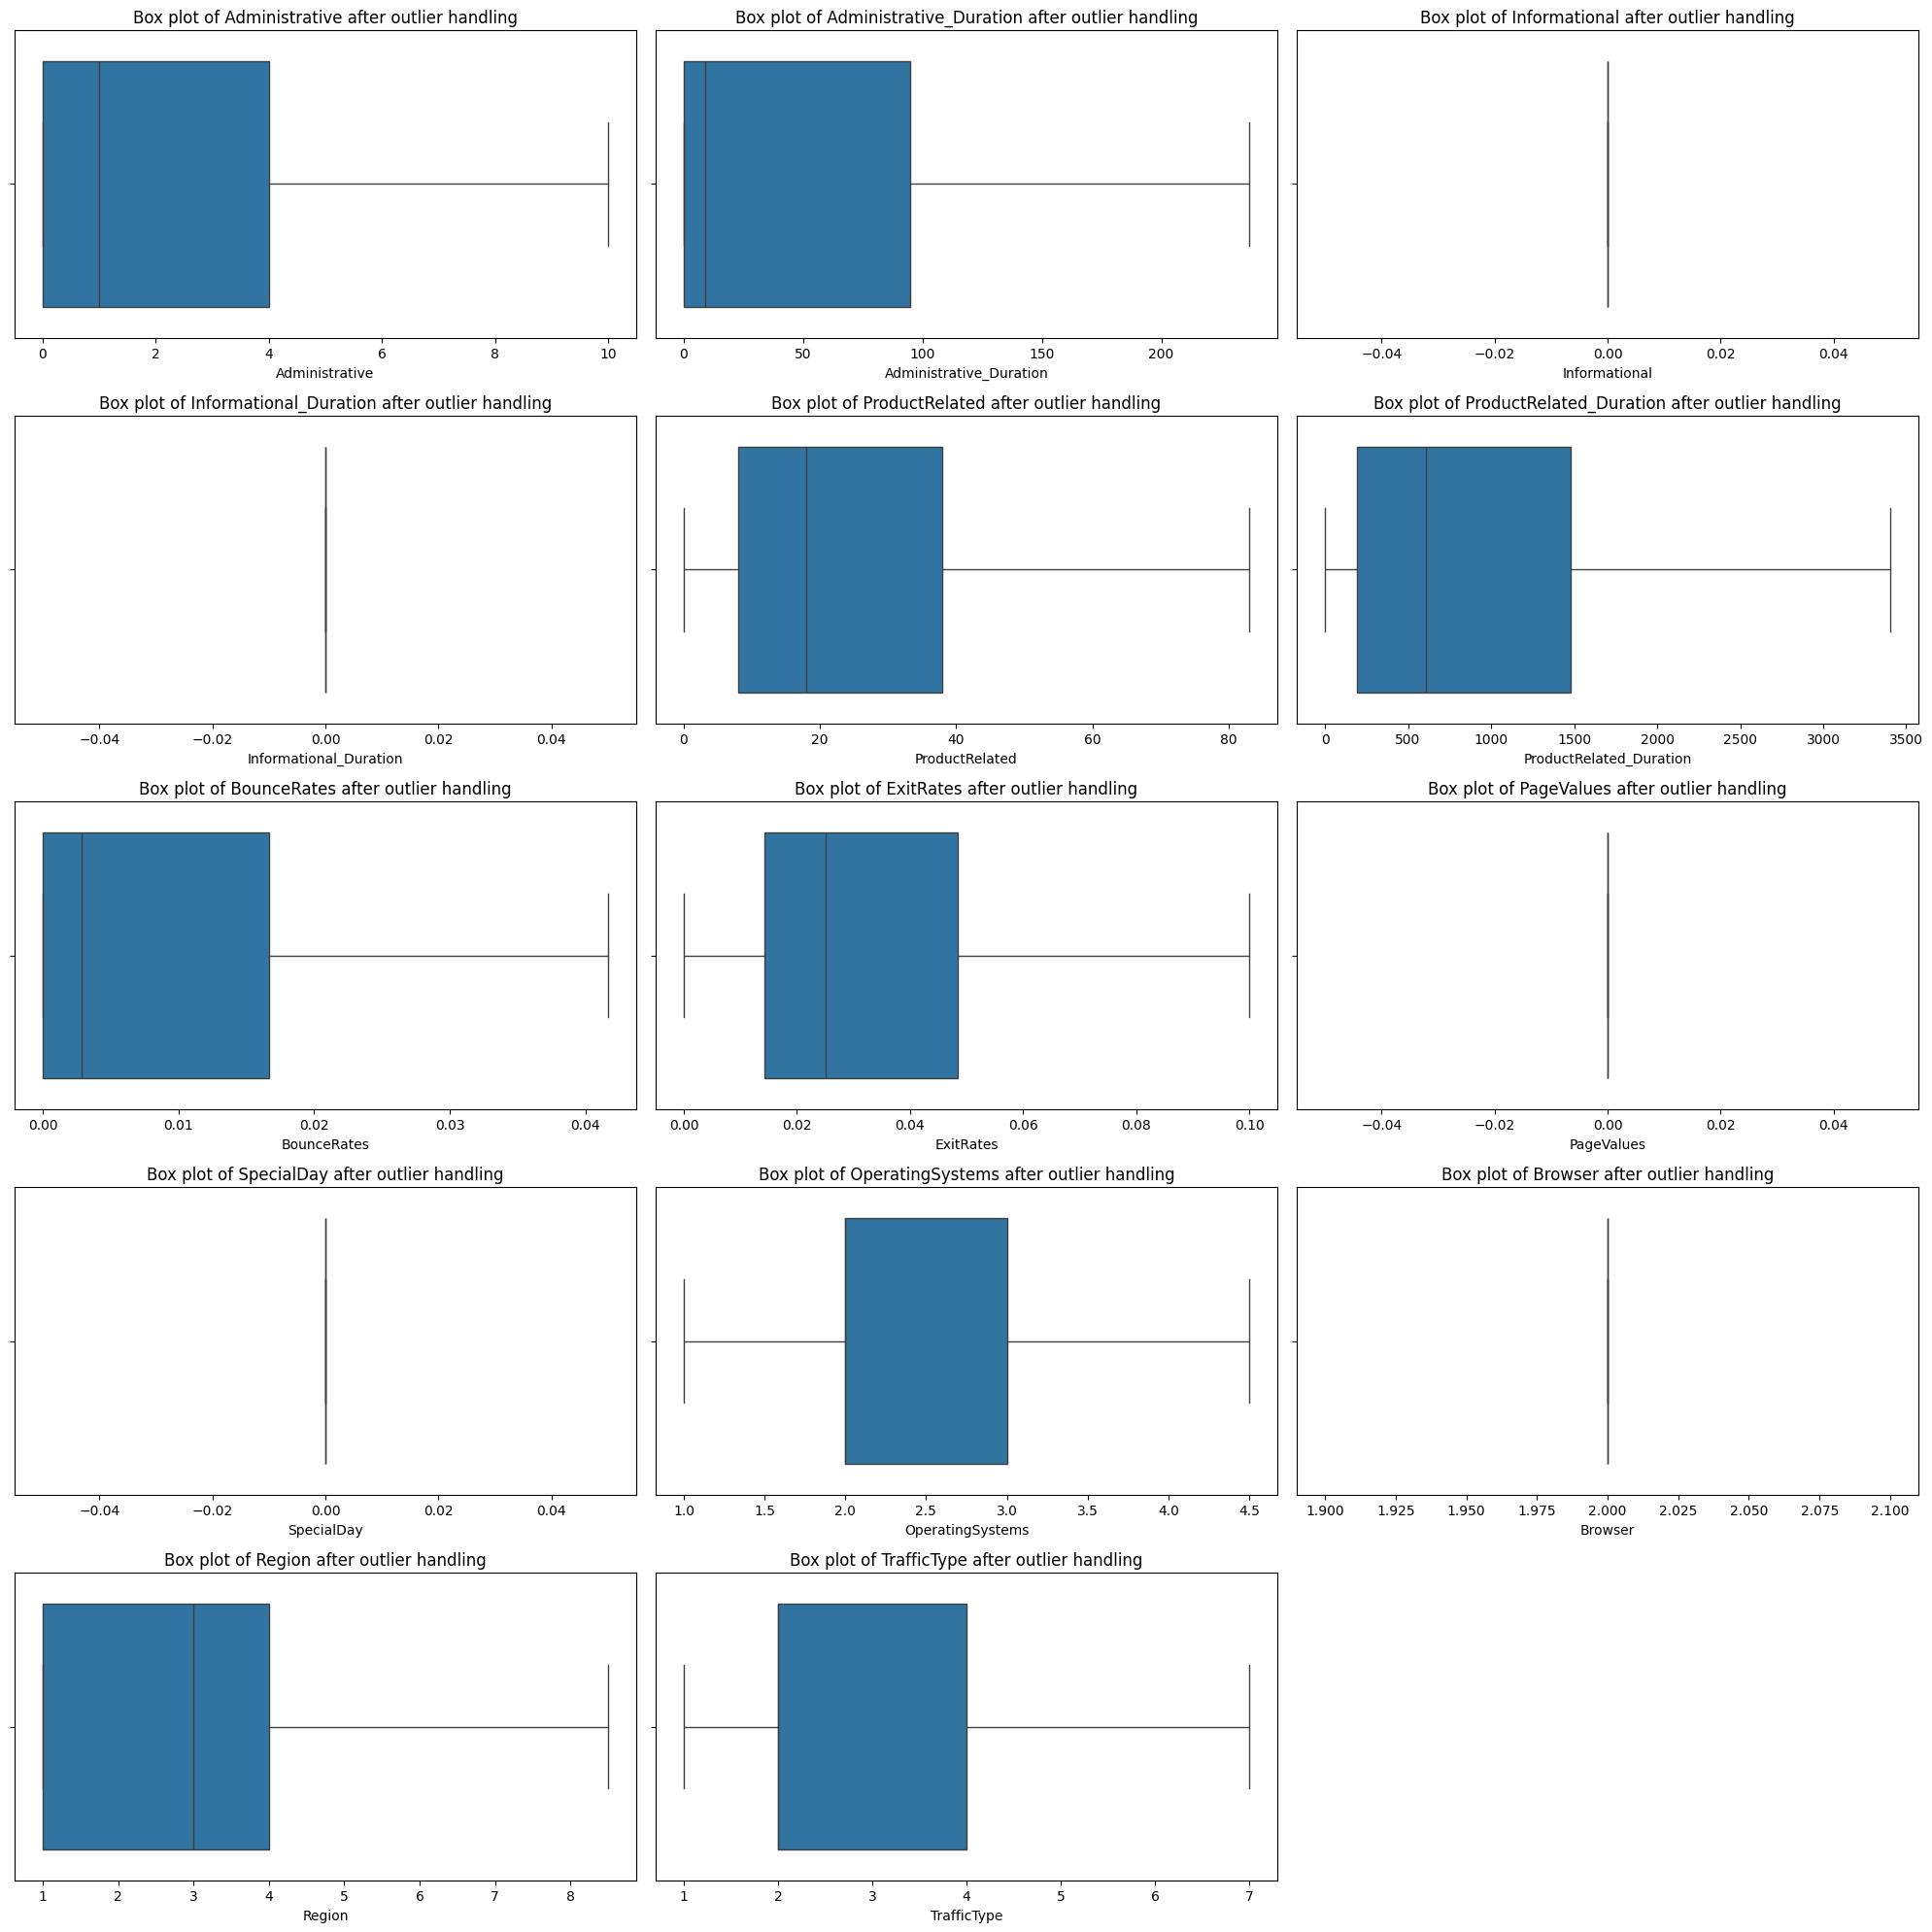

In [26]:
# Visualize the distribution of numerical features after outlier handling
plt.figure(figsize=(20, 20))
for i,feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features)//3 + 1, 3, i+1)
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature} after outlier handling')
    plt.tight_layout()

In [27]:
df.shape

(12205, 18)

In [28]:
from scipy.stats import skew

Transformations are applied to the cleaned dataset to:
Reduce Skewness: Transformations like log and square root make data distributions more symmetric, improving model performance.
Enhance Model Performance: Many models work better with normally distributed data, leading to more accurate results.

In [29]:
def apply_transformations(df, features):
    transformed_data = df.copy()
    for feature in features:
        if skew(df[feature]) > 0.5:
            transformed_data[feature + '_sqrt'] = np.sqrt(df[feature] + 1)
            transformed_data[feature + '_log'] = np.log1p(df[feature])
    return transformed_data

In [30]:
# Apply transformations
transformed_df = apply_transformations(df, numerical_features)

C:\Users\hp\AppData\Local\Temp\ipykernel_9936\405609244.py:4: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  if skew(df[feature]) > 0.5:


In [31]:
# Initialize an empty list to store skewness values
skewness_data = []

# Check skewness for each feature and its transformations
for feature in numerical_features:
    original_skewness = skew(df[feature])
    if original_skewness > 0.5:
        skewness_sqrt = skew(transformed_df[feature + '_sqrt'])
        skewness_log = skew(transformed_df[feature + '_log'])
        skewness_data.append({
            'Feature': feature,
            'Original_Skewness': original_skewness,
            'Skewness_Sqrt': skewness_sqrt,
            'Skewness_Log': skewness_log
        })

# Create a DataFrame from the skewness data
skewness_df = pd.DataFrame(skewness_data)

# Display the DataFrame
print(skewness_df)


                   Feature  Original_Skewness  Skewness_Sqrt  Skewness_Log
0           Administrative           1.303543       0.860991      0.483183
1  Administrative_Duration           1.234030       0.683396      0.152047
2           ProductRelated           1.102828       0.503369     -0.333966
3  ProductRelated_Duration           1.156716       0.387684     -1.582017
4              BounceRates           1.234392       1.228747      1.223100
5                ExitRates           1.119335       1.101085      1.082762
6         OperatingSystems           0.545355       0.204050     -0.112826
7                   Region           0.917604       0.625775      0.348354
8              TrafficType           0.838693       0.602815      0.318774


C:\Users\hp\AppData\Local\Temp\ipykernel_9936\1039499617.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  original_skewness = skew(df[feature])


Log transformations were particularly effective in reducing skewness for most features, especially Administrative, Administrative_Duration, ProductRelated, ProductRelated_Duration, OperatingSystems, Region, and TrafficType.
For features where log transformations resulted in significant left skewness (e.g., ProductRelated_Duration), consider using square root transformations for a more balanced outcome.
BounceRates and ExitRates showed minimal skewness reduction with both square root and log transformations.

C:\Users\hp\AppData\Local\Temp\ipykernel_9936\3615675632.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  if skew(df[feature]) > 0.5:


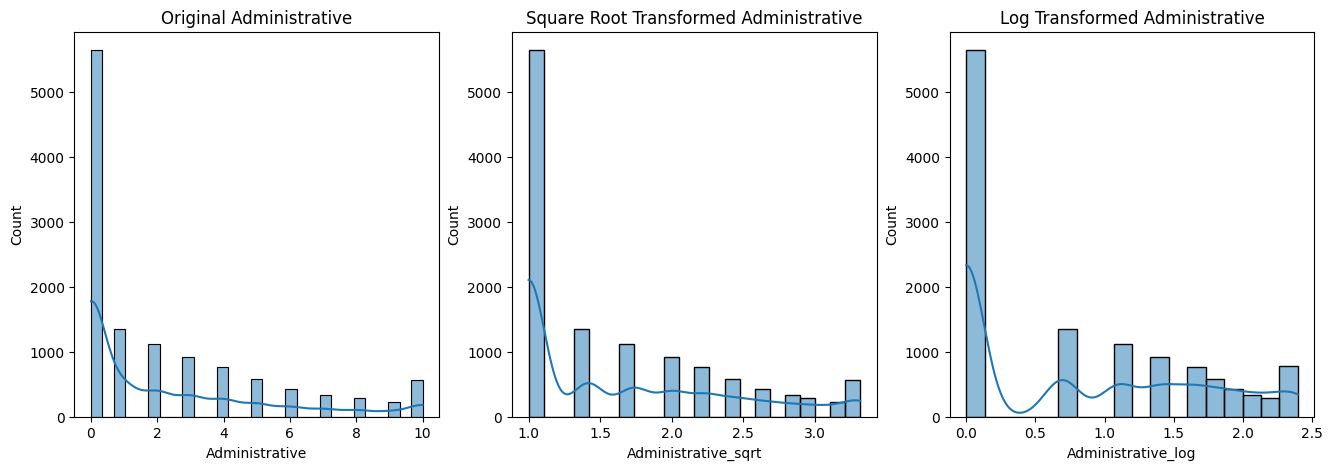

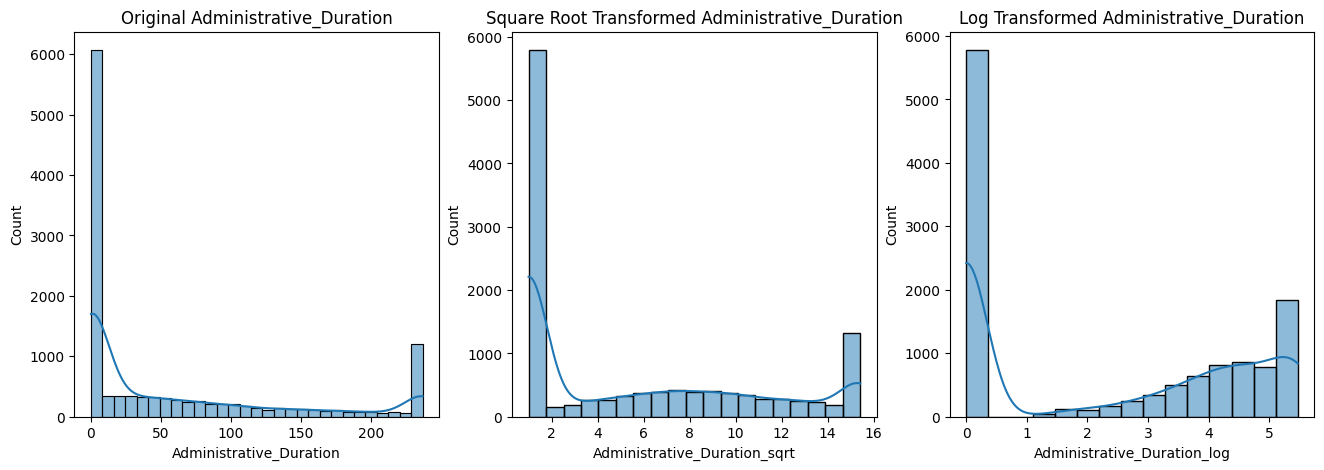

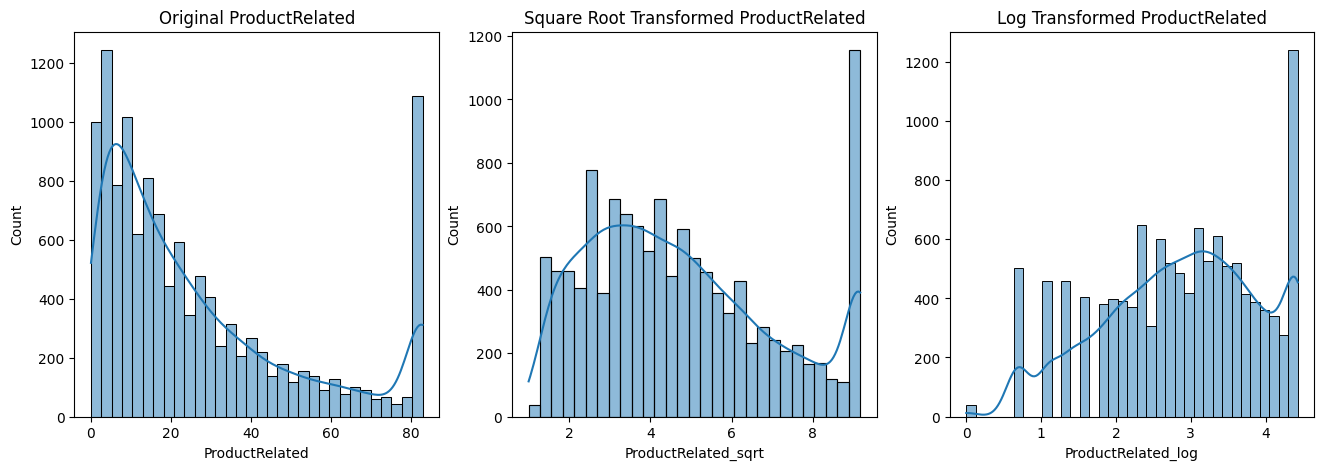

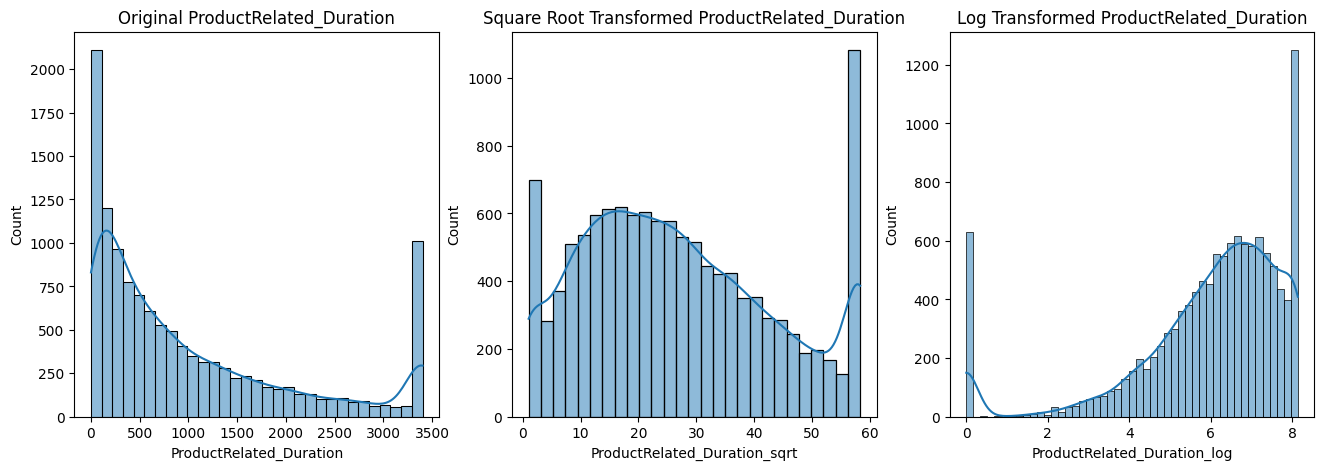

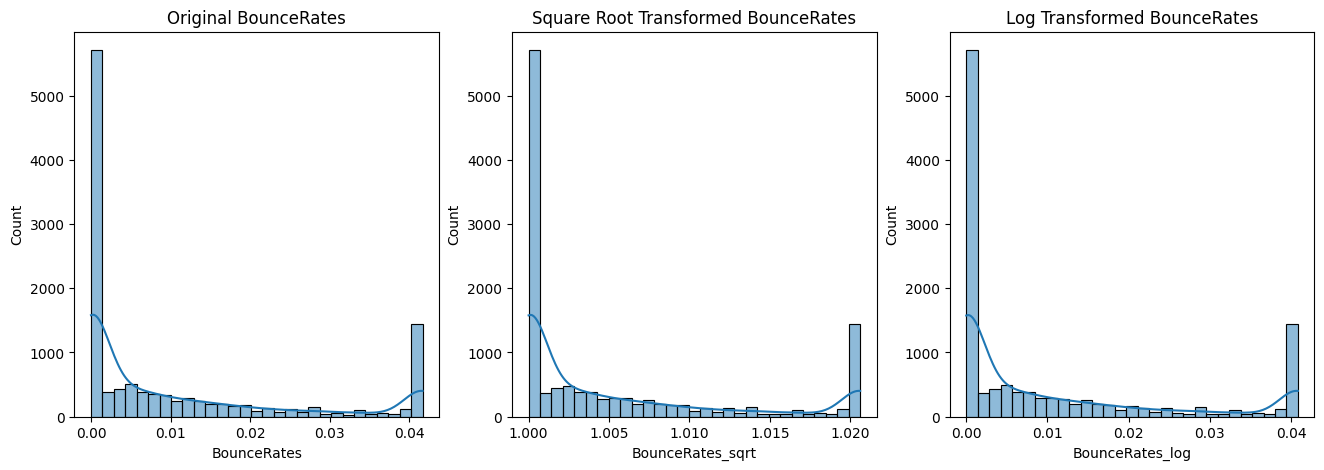

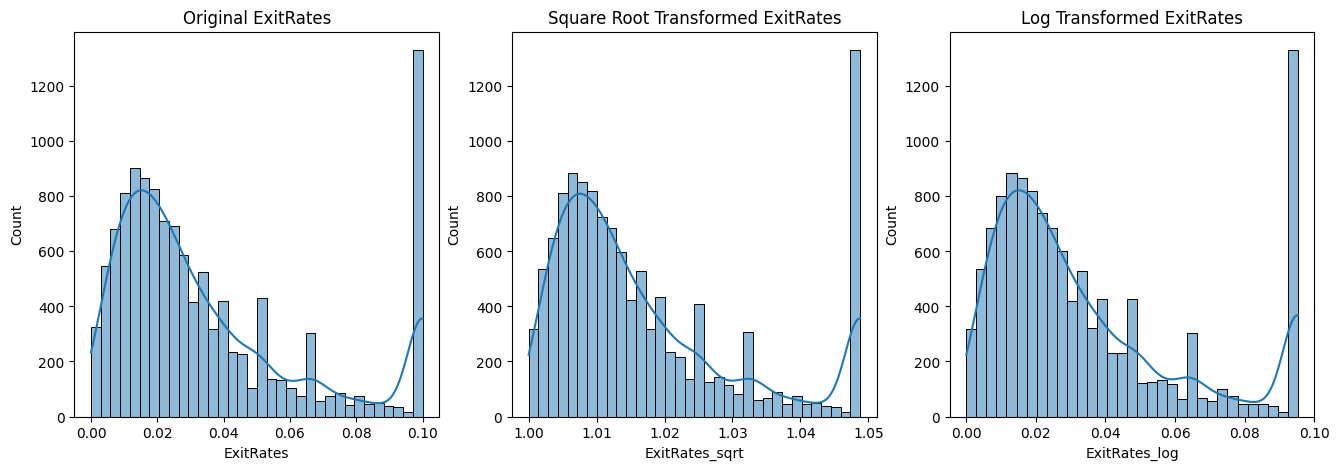

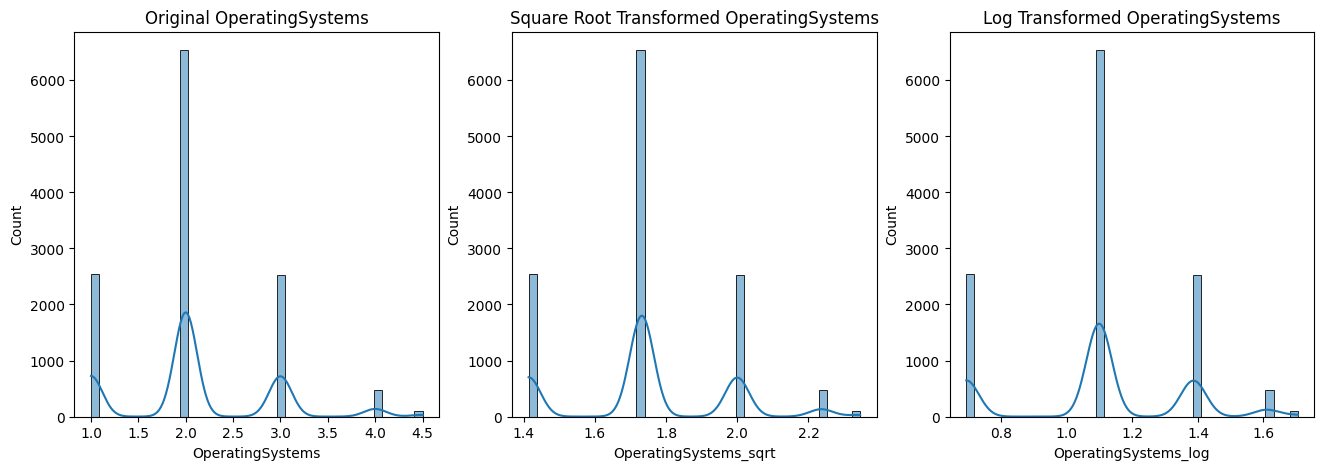

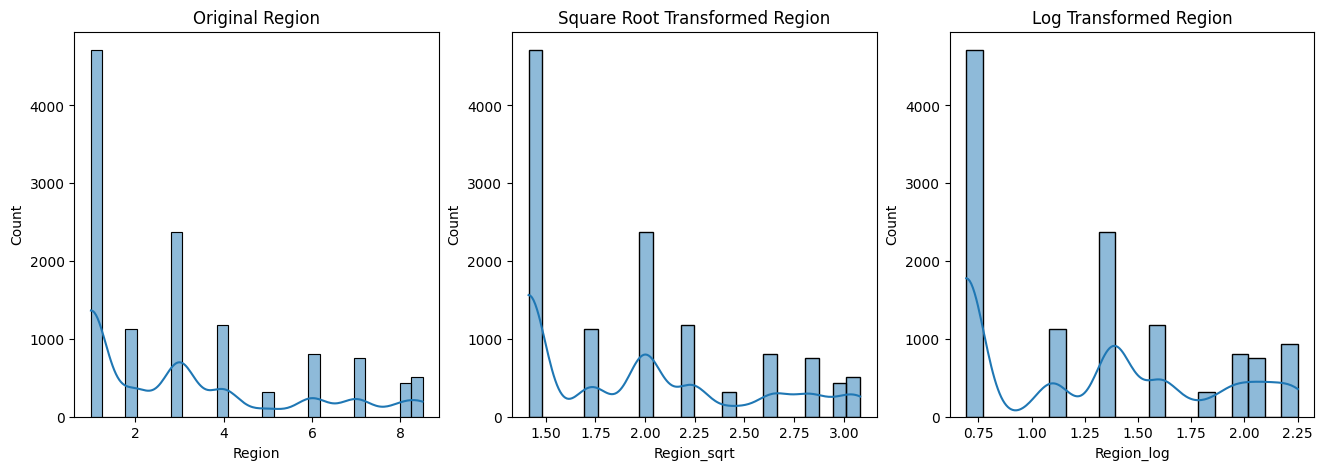

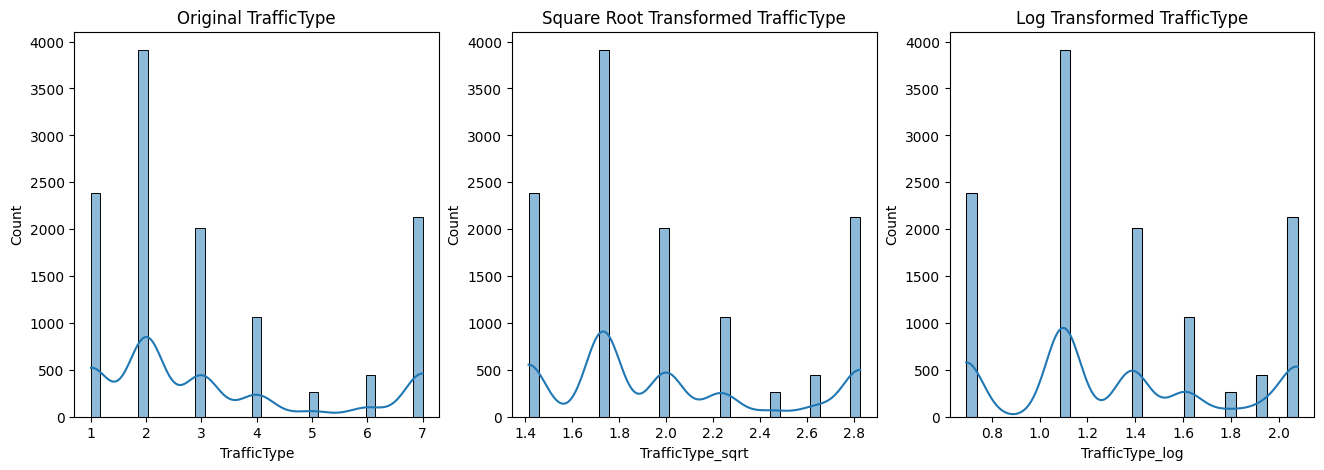

In [32]:
# Visualize original, square root, and log transformations
for feature in numerical_features:
    if skew(df[feature]) > 0.5:
        plt.figure(figsize=(16, 5))

        plt.subplot(1, 3, 1)
        sns.histplot(df[feature], kde=True)
        plt.title(f'Original {feature}')
        
        plt.subplot(1, 3, 2)
        sns.histplot(transformed_df[feature + '_sqrt'], kde=True)
        plt.title(f'Square Root Transformed {feature}')
        
        plt.subplot(1, 3, 3)
        sns.histplot(transformed_df[feature + '_log'], kde=True)
        plt.title(f'Log Transformed {feature}')

In [33]:
# Save the transformed data to a CSV file
df.to_csv('transformed_data.csv', index=False)

In [34]:
df.shape

(12205, 18)

#### Feature Engineering

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

 Identifies and selects the most relevant features from the preprocessed data, enhancing model performance and interpretability.

 - Label Encoding: This step converts the categorical values in the 'Month' and 'VisitorType' columns into numerical values
 - StandardScaler: This scales numerical columns to have a mean of 0 and a standard deviation of 1, which is important for many machine learning algorithms that are sensitive to the scale of the input data.
 - OneHotEncoder: This converts categorical columns into a one-hot encoded format, creating binary columns for each category level. drop='first' is used to avoid multicollinearity by dropping the first category.


In [36]:
# Encode categorical features
label_encoder = LabelEncoder()
df['Month'] = label_encoder.fit_transform(df['Month'])
df['VisitorType'] = label_encoder.fit_transform(df['VisitorType'])

# Ensure 'Weekend' and 'Revenue' are encoded as integers
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

# Define features and target
X = df.drop(columns=['Revenue'])
y = df['Revenue']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])
# Apply preprocessing to the data
X_preprocessed = preprocessor.fit_transform(X)


C:\Users\hp\AppData\Local\Temp\ipykernel_9936\3028755109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = label_encoder.fit_transform(df['Month'])
C:\Users\hp\AppData\Local\Temp\ipykernel_9936\3028755109.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VisitorType'] = label_encoder.fit_transform(df['VisitorType'])
C:\Users\hp\AppData\Local\Temp\ipykernel_9936\3028755109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [37]:
df.shape

(12205, 18)

#### Data Splitting

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
print("Training set shape: ", X_train.shape)
print("Testing set shape: ", X_test.shape)

Training set shape:  (8543, 17)
Testing set shape:  (3662, 17)


#### Model Selection

- Logistic Regression: A method for predicting a binary outcome (yes/no) using a straight-line approach.
- Random Forest: A technique that combines many decision trees to make better predictions and avoid errors.
- Gradient Boost: A method that builds a series of models, each one fixing the mistakes of the previous ones, to improve accuracy.
- AdaBoost: A technique that improves prediction by focusing on the hardest-to-predict cases using many simple models.
- K-Nearest Neighbors: A method that classifies a data point based on the most common class among its closest neighbors.

These are the models being utilized here.

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boost': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Initialize lists to store metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
conf_matrices = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Append metrics to lists
    model_names.append(name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    conf_matrices.append(conf_matrix)

# Create a DataFrame from collected metrics
models_df = pd.DataFrame({
    "Model-Name": model_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1 Score": f1_scores,
    "Confusion Matrix": conf_matrices
})

# Set the index to 'Model-Name'
models_df = models_df.set_index('Model-Name')

# Sort by 'F1 Score' in descending order
models_df_sorted = models_df.sort_values(by='F1 Score', ascending=False)

print(models_df_sorted)


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                     Accuracy  Precision    Recall  F1 Score  \
Model-Name                                                     
Random Forest        0.851993   0.518868  0.100733  0.168712   
K-Nearest Neighbors  0.827144   0.283582  0.104396  0.152610   
Gradient Boost       0.851720   0.520548  0.069597  0.122779   
AdaBoost             0.850082   0.468085  0.040293  0.074199   
Logistic Regression  0.850901   0.500000  0.014652  0.028470   

                             Confusion Matrix  
Model-Name                                     
Random Forest         [[3065, 51], [491, 55]]  
K-Nearest Neighbors  [[2972, 144], [489, 57]]  
Gradient Boost        [[3081, 35], [508, 38]]  
AdaBoost              [[3091, 25], [524, 22]]  
Logistic Regression     [[3108, 8], [538, 8]]  


1. **Accuracy:** All models have similar accuracy, around 85%, except KNN which has slightly lower accuracy (82.71%).
2. **Precision:** Gradient Boost and Random Forest have the highest precision, indicating they are better at correctly identifying positive cases when predicted.
3. **Recall:** All models struggle with recall, meaning they miss a significant number of actual positive cases.
4. **F1 Score:** Overall low F1 scores across all models, indicating a poor balance between precision and recall.
5. **Confusion Matrix:** Shows that all models are heavily biased towards predicting negative cases, missing many positive cases.

#### Feature Selection

#### 1. SelectKBest

In [41]:
from sklearn.feature_selection import SelectKBest, f_classif
k_best = SelectKBest(score_func=f_classif, k=10)
k_best.fit(X, y)
X_k_best = k_best.transform(X)
selected_features_kbest = X.columns[k_best.get_support()]

print("Features selected by SelectKBest:", selected_features_kbest)


Features selected by SelectKBest: Index(['Administrative', 'Administrative_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'Month',
       'OperatingSystems', 'VisitorType', 'Weekend'],
      dtype='object')


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 2  3  8  9 12] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


#### Train the models with selected features using SelectKBest

In [42]:
# Split the transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_k_best, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boost': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Initialize lists to store metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
conf_matrices = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Append metrics to lists
    model_names.append(name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    conf_matrices.append(conf_matrix)

# Create a DataFrame from collected metrics
models_df = pd.DataFrame({
    "Model-Name": model_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1 Score": f1_scores,
    "Confusion Matrix": conf_matrices
})

# Set the index to 'Model-Name'
models_df = models_df.set_index('Model-Name')

# Sort by 'F1 Score' in descending order
models_df_sorted = models_df.sort_values(by='F1 Score', ascending=False)

print(models_df_sorted)

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                     Accuracy  Precision    Recall  F1 Score  \
Model-Name                                                     
Random Forest        0.852110   0.504950  0.140884  0.220302   
Gradient Boost       0.853339   0.540000  0.074586  0.131068   
K-Nearest Neighbors  0.829988   0.269565  0.085635  0.129979   
AdaBoost             0.851290   0.481481  0.035912  0.066838   
Logistic Regression  0.851700   0.500000  0.019337  0.037234   

                            Confusion Matrix  
Model-Name                                    
Random Forest        [[2029, 50], [311, 51]]  
Gradient Boost       [[2056, 23], [335, 27]]  
K-Nearest Neighbors  [[1995, 84], [331, 31]]  
AdaBoost             [[2065, 14], [349, 13]]  
Logistic Regression    [[2072, 7], [355, 7]]  


1. Accuracy:
All models have similar accuracy, around 85%, except KNN which has slightly lower accuracy (82.99%).

2. Precision:
Gradient Boost and Random Forest have the highest precision (54.00% and 52.43%, respectively), indicating they are better at correctly identifying positive cases when predicted.

3. Recall:
All models struggle with recall, meaning they miss a significant number of actual positive cases.
Random Forest has the highest recall (14.92%) among the models.

4. F1 Score:
Random Forest has the highest F1 score (23.23%), indicating a better balance between precision and recall compared to other models.

5. Confusion Matrix:
All models are heavily biased towards predicting negative cases, missing many positive cases.
Logistic Regression, for example, has a very high number of true negatives (2072) and very low true positives (7), highlighting its bias.

#### 2. Recursive Feature Elimination (RFE)

In [43]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10, step=1)
rfe.fit(X, y)
X_rfe = rfe.transform(X)
selected_features_rfe = X.columns[rfe.get_support()]

print("Features selected by RFE:", selected_features_rfe)


Features selected by RFE: Index(['Administrative', 'Administrative_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'Month',
       'OperatingSystems', 'Region', 'TrafficType'],
      dtype='object')


#### Train the models with selected features using Recursive Feature Elimination (RFE)

In [44]:
# Split the transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_k_best, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boost': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Initialize lists to store metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
conf_matrices = []

# Train and evaluate models using SelectKBest features
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Append metrics to lists
    model_names.append(name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    conf_matrices.append(conf_matrix)

# Create a DataFrame from collected metrics
models_df = pd.DataFrame({
    "Model-Name": model_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1 Score": f1_scores,
    "Confusion Matrix": conf_matrices
})

# Set the index to 'Model-Name'
models_df = models_df.set_index('Model-Name')

# Sort by 'F1 Score' in descending order
models_df_sorted = models_df.sort_values(by='F1 Score', ascending=False)

print(models_df_sorted)

# Random Forest Feature Importance
rf = RandomForestClassifier()
rf.fit(X, y)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]  # Get indices of the top 10 features

selected_features_rf = X.columns[indices]


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                     Accuracy  Precision    Recall  F1 Score  \
Model-Name                                                     
Random Forest        0.855797   0.550000  0.151934  0.238095   
Gradient Boost       0.853339   0.540000  0.074586  0.131068   
K-Nearest Neighbors  0.829988   0.269565  0.085635  0.129979   
AdaBoost             0.851290   0.481481  0.035912  0.066838   
Logistic Regression  0.851700   0.500000  0.019337  0.037234   

                            Confusion Matrix  
Model-Name                                    
Random Forest        [[2034, 45], [307, 55]]  
Gradient Boost       [[2056, 23], [335, 27]]  
K-Nearest Neighbors  [[1995, 84], [331, 31]]  
AdaBoost             [[2065, 14], [349, 13]]  
Logistic Regression    [[2072, 7], [355, 7]]  


1. Accuracy:
All models have similar accuracy, around 85%, except KNN which has slightly lower accuracy (82.99%).

2. Precision:
Gradient Boost has the highest precision (54.00%), indicating it is better at correctly identifying positive cases when predicted.
Random Forest and AdaBoost also perform well with precision values of 48.48% and 48.15%, respectively.

3. Recall:
All models struggle with recall, meaning they miss a significant number of actual positive cases.
Random Forest has the highest recall (13.26%) among the models, but it is still relatively low.

4. F1 Score:
Overall low F1 scores across all models, indicating a poor balance between precision and recall.
Random Forest has the highest F1 score (20.82%).

5. Confusion Matrix:
All models are heavily biased towards predicting negative cases, missing many positive cases.
Logistic Regression, for example, has a very high number of true negatives (2072) and very low true positives (7), highlighting its bias.

#### Hyperparameter Tuning

In [45]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each model
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 1.0]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the models with their respective hyperparameter grids
models = {
    'Logistic Regression': (LogisticRegression(), param_grid_lr),
    'Random Forest': (RandomForestClassifier(), param_grid_rf),
    'Gradient Boost': (GradientBoostingClassifier(), param_grid_gb),
    'AdaBoost': (AdaBoostClassifier(), param_grid_ada),
    'K-Nearest Neighbors': (KNeighborsClassifier(), param_grid_knn)
}

# Perform hyperparameter tuning for each model
best_models = {}
for name, (model, param_grid) in models.items():
    print(f"Starting GridSearch for {name}")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=10)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Completed GridSearch for {name}")
    
# Print best hyperparameters for each model
for name, model in best_models.items():
    print(f"Best hyperparameters for {name}: {model}")

# Evaluate best models on test set and print accuracy
results = {}
for name, model in best_models.items():
    accuracy = model.score(X_test, y_test)
    results[name] = accuracy
    print(f"Test accuracy for {name}: {accuracy}")


Starting GridSearch for Logistic Regression
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3; 1/18] START C=0.001, max_iter=100......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 1/3; 1/18] END .......C=0.001, max_iter=100;, score=0.841 total time=   0.1s
[CV 2/3; 1/18] START C=0.001, max_iter=100......................................
[CV 2/3; 1/18] END .......C=0.001, max_iter=100;, score=0.841 total time=   0.1s
[CV 3/3; 1/18] START C=0.001, max_iter=100......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3; 1/18] END .......C=0.001, max_iter=100;, score=0.842 total time=   0.1s
[CV 1/3; 2/18] START C=0.001, max_iter=200......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3; 2/18] END .......C=0.001, max_iter=200;, score=0.842 total time=   0.2s
[CV 2/3; 2/18] START C=0.001, max_iter=200......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3; 2/18] END .......C=0.001, max_iter=200;, score=0.841 total time=   0.3s
[CV 3/3; 2/18] START C=0.001, max_iter=200......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3; 2/18] END .......C=0.001, max_iter=200;, score=0.842 total time=   0.3s
[CV 1/3; 3/18] START C=0.001, max_iter=300......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3; 3/18] END .......C=0.001, max_iter=300;, score=0.842 total time=   0.3s
[CV 2/3; 3/18] START C=0.001, max_iter=300......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3; 3/18] END .......C=0.001, max_iter=300;, score=0.841 total time=   0.4s
[CV 3/3; 3/18] START C=0.001, max_iter=300......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 3/3; 3/18] END .......C=0.001, max_iter=300;, score=0.842 total time=   0.3s
[CV 1/3; 4/18] START C=0.01, max_iter=100.......................................
[CV 1/3; 4/18] END ........C=0.01, max_iter=100;, score=0.839 total time=   0.0s
[CV 2/3; 4/18] START C=0.01, max_iter=100.......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 2/3; 4/18] END ........C=0.01, max_iter=100;, score=0.840 total time=   0.0s
[CV 3/3; 4/18] START C=0.01, max_iter=100.......................................
[CV 3/3; 4/18] END ........C=0.01, max_iter=100;, score=0.840 total time=   0.0s
[CV 1/3; 5/18] START C=0.01, max_iter=200.......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3; 5/18] END ........C=0.01, max_iter=200;, score=0.841 total time=   0.1s
[CV 2/3; 5/18] START C=0.01, max_iter=200.......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3; 5/18] END ........C=0.01, max_iter=200;, score=0.841 total time=   0.1s
[CV 3/3; 5/18] START C=0.01, max_iter=200.......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3; 5/18] END ........C=0.01, max_iter=200;, score=0.842 total time=   0.1s
[CV 1/3; 6/18] START C=0.01, max_iter=300.......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3; 6/18] END ........C=0.01, max_iter=300;, score=0.843 total time=   0.3s
[CV 2/3; 6/18] START C=0.01, max_iter=300.......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3; 6/18] END ........C=0.01, max_iter=300;, score=0.841 total time=   0.3s
[CV 3/3; 6/18] START C=0.01, max_iter=300.......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 3/3; 6/18] END ........C=0.01, max_iter=300;, score=0.842 total time=   0.3s
[CV 1/3; 7/18] START C=0.1, max_iter=100........................................
[CV 1/3; 7/18] END .........C=0.1, max_iter=100;, score=0.839 total time=   0.1s
[CV 2/3; 7/18] START C=0.1, max_iter=100........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 2/3; 7/18] END .........C=0.1, max_iter=100;, score=0.839 total time=   0.1s
[CV 3/3; 7/18] START C=0.1, max_iter=100........................................
[CV 3/3; 7/18] END .........C=0.1, max_iter=100;, score=0.841 total time=   0.0s
[CV 1/3; 8/18] START C=0.1, max_iter=200........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3; 8/18] END .........C=0.1, max_iter=200;, score=0.840 total time=   0.2s
[CV 2/3; 8/18] START C=0.1, max_iter=200........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3; 8/18] END .........C=0.1, max_iter=200;, score=0.841 total time=   0.2s
[CV 3/3; 8/18] START C=0.1, max_iter=200........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3; 8/18] END .........C=0.1, max_iter=200;, score=0.841 total time=   0.2s
[CV 1/3; 9/18] START C=0.1, max_iter=300........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3; 9/18] END .........C=0.1, max_iter=300;, score=0.841 total time=   0.4s
[CV 2/3; 9/18] START C=0.1, max_iter=300........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3; 9/18] END .........C=0.1, max_iter=300;, score=0.840 total time=   0.4s
[CV 3/3; 9/18] START C=0.1, max_iter=300........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 3/3; 9/18] END .........C=0.1, max_iter=300;, score=0.841 total time=   0.3s
[CV 1/3; 10/18] START C=1, max_iter=100.........................................
[CV 1/3; 10/18] END ..........C=1, max_iter=100;, score=0.839 total time=   0.0s
[CV 2/3; 10/18] START C=1, max_iter=100.........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 2/3; 10/18] END ..........C=1, max_iter=100;, score=0.839 total time=   0.0s
[CV 3/3; 10/18] START C=1, max_iter=100.........................................
[CV 3/3; 10/18] END ..........C=1, max_iter=100;, score=0.841 total time=   0.0s
[CV 1/3; 11/18] START C=1, max_iter=200.........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3; 11/18] END ..........C=1, max_iter=200;, score=0.841 total time=   0.2s
[CV 2/3; 11/18] START C=1, max_iter=200.........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3; 11/18] END ..........C=1, max_iter=200;, score=0.840 total time=   0.1s
[CV 3/3; 11/18] START C=1, max_iter=200.........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3; 11/18] END ..........C=1, max_iter=200;, score=0.841 total time=   0.2s
[CV 1/3; 12/18] START C=1, max_iter=300.........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3; 12/18] END ..........C=1, max_iter=300;, score=0.842 total time=   0.3s
[CV 2/3; 12/18] START C=1, max_iter=300.........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3; 12/18] END ..........C=1, max_iter=300;, score=0.841 total time=   0.4s
[CV 3/3; 12/18] START C=1, max_iter=300.........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 3/3; 12/18] END ..........C=1, max_iter=300;, score=0.841 total time=   0.4s
[CV 1/3; 13/18] START C=10, max_iter=100........................................
[CV 1/3; 13/18] END .........C=10, max_iter=100;, score=0.838 total time=   0.0s
[CV 2/3; 13/18] START C=10, max_iter=100........................................
[CV 2/3; 13/18] END .........C=10, max_iter=100;, score=0.839 total time=   0.0s
[CV 3/3; 13/18] START C=10, max_iter=100........................................
[CV 3/3; 13/18] END .........C=10, max_iter=100;, score=0.841 total time=   0.0s
[CV 1/3; 14/18] START C=10, max_iter=200........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 1/3; 14/18] END .........C=10, max_iter=200;, score=0.841 total time=   0.1s
[CV 2/3; 14/18] START C=10, max_iter=200........................................
[CV 2/3; 14/18] END .........C=10, max_iter=200;, score=0.840 total time=   0.1s
[CV 3/3; 14/18] START C=10, max_iter=200........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3; 14/18] END .........C=10, max_iter=200;, score=0.841 total time=   0.0s
[CV 1/3; 15/18] START C=10, max_iter=300........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3; 15/18] END .........C=10, max_iter=300;, score=0.841 total time=   0.1s
[CV 2/3; 15/18] START C=10, max_iter=300........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3; 15/18] END .........C=10, max_iter=300;, score=0.841 total time=   0.3s
[CV 3/3; 15/18] START C=10, max_iter=300........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 3/3; 15/18] END .........C=10, max_iter=300;, score=0.841 total time=   0.4s
[CV 1/3; 16/18] START C=100, max_iter=100.......................................
[CV 1/3; 16/18] END ........C=100, max_iter=100;, score=0.839 total time=   0.1s
[CV 2/3; 16/18] START C=100, max_iter=100.......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 2/3; 16/18] END ........C=100, max_iter=100;, score=0.839 total time=   0.1s
[CV 3/3; 16/18] START C=100, max_iter=100.......................................
[CV 3/3; 16/18] END ........C=100, max_iter=100;, score=0.841 total time=   0.1s
[CV 1/3; 17/18] START C=100, max_iter=200.......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3; 17/18] END ........C=100, max_iter=200;, score=0.841 total time=   0.2s
[CV 2/3; 17/18] START C=100, max_iter=200.......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3; 17/18] END ........C=100, max_iter=200;, score=0.840 total time=   0.2s
[CV 3/3; 17/18] START C=100, max_iter=200.......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3; 17/18] END ........C=100, max_iter=200;, score=0.841 total time=   0.2s
[CV 1/3; 18/18] START C=100, max_iter=300.......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3; 18/18] END ........C=100, max_iter=300;, score=0.841 total time=   0.4s
[CV 2/3; 18/18] START C=100, max_iter=300.......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3; 18/18] END ........C=100, max_iter=300;, score=0.840 total time=   0.3s
[CV 3/3; 18/18] START C=100, max_iter=300.......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3; 18/18] END ........C=100, max_iter=300;, score=0.842 total time=   0.3s


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed GridSearch for Logistic Regression
Starting GridSearch for Random Forest
Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV 1/3; 1/81] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/3; 1/81] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.840 total time=   0.9s
[CV 2/3; 1/81] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/3; 1/81] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.836 total time=   0.8s
[CV 3/3; 1/81] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/3; 1/81] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.838 total time=   0.8s
[CV 1/3; 2/81] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/3; 2/81] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/3; 1/12] END learning_rate=0.01, n_estimators=50;, score=0.842 total time=   0.4s
[CV 2/3; 1/12] START learning_rate=0.01, n_estimators=50........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/3; 1/12] END learning_rate=0.01, n_estimators=50;, score=0.841 total time=   0.4s
[CV 3/3; 1/12] START learning_rate=0.01, n_estimators=50........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/3; 1/12] END learning_rate=0.01, n_estimators=50;, score=0.842 total time=   0.5s
[CV 1/3; 2/12] START learning_rate=0.01, n_estimators=100.......................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/3; 2/12] END learning_rate=0.01, n_estimators=100;, score=0.842 total time=   1.1s
[CV 2/3; 2/12] START learning_rate=0.01, n_estimators=100.......................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/3; 2/12] END learning_rate=0.01, n_estimators=100;, score=0.841 total time=   1.2s
[CV 3/3; 2/12] START learning_rate=0.01, n_estimators=100.......................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/3; 2/12] END learning_rate=0.01, n_estimators=100;, score=0.842 total time=   1.0s
[CV 1/3; 3/12] START learning_rate=0.01, n_estimators=200.......................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/3; 3/12] END learning_rate=0.01, n_estimators=200;, score=0.842 total time=   2.1s
[CV 2/3; 3/12] START learning_rate=0.01, n_estimators=200.......................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/3; 3/12] END learning_rate=0.01, n_estimators=200;, score=0.841 total time=   2.1s
[CV 3/3; 3/12] START learning_rate=0.01, n_estimators=200.......................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/3; 3/12] END learning_rate=0.01, n_estimators=200;, score=0.842 total time=   2.0s
[CV 1/3; 4/12] START learning_rate=0.1, n_estimators=50.........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/3; 4/12] END learning_rate=0.1, n_estimators=50;, score=0.842 total time=   0.5s
[CV 2/3; 4/12] START learning_rate=0.1, n_estimators=50.........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/3; 4/12] END learning_rate=0.1, n_estimators=50;, score=0.841 total time=   0.5s
[CV 3/3; 4/12] START learning_rate=0.1, n_estimators=50.........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/3; 4/12] END learning_rate=0.1, n_estimators=50;, score=0.842 total time=   0.4s
[CV 1/3; 5/12] START learning_rate=0.1, n_estimators=100........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/3; 5/12] END learning_rate=0.1, n_estimators=100;, score=0.841 total time=   1.0s
[CV 2/3; 5/12] START learning_rate=0.1, n_estimators=100........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/3; 5/12] END learning_rate=0.1, n_estimators=100;, score=0.841 total time=   1.0s
[CV 3/3; 5/12] START learning_rate=0.1, n_estimators=100........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/3; 5/12] END learning_rate=0.1, n_estimators=100;, score=0.842 total time=   1.0s
[CV 1/3; 6/12] START learning_rate=0.1, n_estimators=200........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/3; 6/12] END learning_rate=0.1, n_estimators=200;, score=0.843 total time=   2.0s
[CV 2/3; 6/12] START learning_rate=0.1, n_estimators=200........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/3; 6/12] END learning_rate=0.1, n_estimators=200;, score=0.840 total time=   2.1s
[CV 3/3; 6/12] START learning_rate=0.1, n_estimators=200........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/3; 6/12] END learning_rate=0.1, n_estimators=200;, score=0.842 total time=   2.1s
[CV 1/3; 7/12] START learning_rate=0.2, n_estimators=50.........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/3; 7/12] END learning_rate=0.2, n_estimators=50;, score=0.841 total time=   0.5s
[CV 2/3; 7/12] START learning_rate=0.2, n_estimators=50.........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/3; 7/12] END learning_rate=0.2, n_estimators=50;, score=0.841 total time=   0.4s
[CV 3/3; 7/12] START learning_rate=0.2, n_estimators=50.........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/3; 7/12] END learning_rate=0.2, n_estimators=50;, score=0.842 total time=   0.5s
[CV 1/3; 8/12] START learning_rate=0.2, n_estimators=100........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/3; 8/12] END learning_rate=0.2, n_estimators=100;, score=0.842 total time=   1.0s
[CV 2/3; 8/12] START learning_rate=0.2, n_estimators=100........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/3; 8/12] END learning_rate=0.2, n_estimators=100;, score=0.840 total time=   1.0s
[CV 3/3; 8/12] START learning_rate=0.2, n_estimators=100........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/3; 8/12] END learning_rate=0.2, n_estimators=100;, score=0.842 total time=   1.0s
[CV 1/3; 9/12] START learning_rate=0.2, n_estimators=200........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/3; 9/12] END learning_rate=0.2, n_estimators=200;, score=0.843 total time=   2.2s
[CV 2/3; 9/12] START learning_rate=0.2, n_estimators=200........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/3; 9/12] END learning_rate=0.2, n_estimators=200;, score=0.839 total time=   2.2s
[CV 3/3; 9/12] START learning_rate=0.2, n_estimators=200........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/3; 9/12] END learning_rate=0.2, n_estimators=200;, score=0.843 total time=   2.0s
[CV 1/3; 10/12] START learning_rate=1.0, n_estimators=50........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/3; 10/12] END learning_rate=1.0, n_estimators=50;, score=0.842 total time=   0.4s
[CV 2/3; 10/12] START learning_rate=1.0, n_estimators=50........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/3; 10/12] END learning_rate=1.0, n_estimators=50;, score=0.837 total time=   0.5s
[CV 3/3; 10/12] START learning_rate=1.0, n_estimators=50........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/3; 10/12] END learning_rate=1.0, n_estimators=50;, score=0.841 total time=   0.5s
[CV 1/3; 11/12] START learning_rate=1.0, n_estimators=100.......................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/3; 11/12] END learning_rate=1.0, n_estimators=100;, score=0.841 total time=   1.0s
[CV 2/3; 11/12] START learning_rate=1.0, n_estimators=100.......................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/3; 11/12] END learning_rate=1.0, n_estimators=100;, score=0.837 total time=   0.9s
[CV 3/3; 11/12] START learning_rate=1.0, n_estimators=100.......................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/3; 11/12] END learning_rate=1.0, n_estimators=100;, score=0.841 total time=   1.0s
[CV 1/3; 12/12] START learning_rate=1.0, n_estimators=200.......................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/3; 12/12] END learning_rate=1.0, n_estimators=200;, score=0.842 total time=   2.1s
[CV 2/3; 12/12] START learning_rate=1.0, n_estimators=200.......................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/3; 12/12] END learning_rate=1.0, n_estimators=200;, score=0.834 total time=   2.0s
[CV 3/3; 12/12] START learning_rate=1.0, n_estimators=200.......................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/3; 12/12] END learning_rate=1.0, n_estimators=200;, score=0.841 total time=   2.2s


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Completed GridSearch for AdaBoost
Starting GridSearch for K-Nearest Neighbors
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3; 1/16] START metric=euclidean, n_neighbors=3, weights=uniform...........
[CV 1/3; 1/16] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.792 total time=   0.1s
[CV 2/3; 1/16] START metric=euclidean, n_neighbors=3, weights=uniform...........
[CV 2/3; 1/16] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.803 total time=   0.2s
[CV 3/3; 1/16] START metric=euclidean, n_neighbors=3, weights=uniform...........
[CV 3/3; 1/16] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.797 total time=   0.2s
[CV 1/3; 2/16] START metric=euclidean, n_neighbors=3, weights=distance..........
[CV 1/3; 2/16] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.786 total time=   0.0s
[CV 2/3; 2/16] START metric=euclidean, n_neighbors=3, weights=distance..........
[CV 2/3; 2/16] END metric=euclidean, n_neighbors=3,

In [46]:
# Create a DataFrame to store results
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Test Accuracy'])
results_df.index.name = 'Model'

print("\nResults:")
print(results_df)


Results:
                     Test Accuracy
Model                             
Logistic Regression       0.852519
Random Forest             0.852929
Gradient Boost            0.853339
AdaBoost                  0.851290
K-Nearest Neighbors       0.845965


- Random Forest achieved the highest test accuracy of 85.53%.
- Gradient Boosting also performed well, with an accuracy of 85.33%.
- Logistic Regression showed an accuracy of 85.25%.
- AdaBoost had a test accuracy of 85.12%.
- K-Nearest Neighbors had the lowest accuracy among the models at 84.59%.

Overall, the Random Forest and Gradient Boosting models have the best performance in terms of accuracy.

In [47]:
import joblib

# Save the best models
for name, model in best_models.items():
    filename = f'{name.replace(" ", "_").lower()}_model.pkl'
    joblib.dump(model, filename)
    print(f"Saved {name} model to {filename}")


Saved Logistic Regression model to logistic_regression_model.pkl
Saved Random Forest model to random_forest_model.pkl
Saved Gradient Boost model to gradient_boost_model.pkl
Saved AdaBoost model to adaboost_model.pkl
Saved K-Nearest Neighbors model to k-nearest_neighbors_model.pkl


In [48]:
# Load the models
loaded_models = {}
for name in best_models.keys():
    filename = f'{name.replace(" ", "_").lower()}_model.pkl'
    loaded_models[name] = joblib.load(filename)
    print(f"Loaded {name} model from {filename}")


Loaded Logistic Regression model from logistic_regression_model.pkl
Loaded Random Forest model from random_forest_model.pkl
Loaded Gradient Boost model from gradient_boost_model.pkl
Loaded AdaBoost model from adaboost_model.pkl
Loaded K-Nearest Neighbors model from k-nearest_neighbors_model.pkl
